# The Sparks Foundation

### Graduate Rotational Internship (GRIP)

### April 2023 Batch

## Candidate Name :Shweta Kulkarni

## Task 4 : Exploratory Data Analysis - Terrorism

#### Objective of the Task is to Perform EDA on 'GlobalTerrorism' Dataset. As a Security/Defense Analyst, and try to find out the hot zone of Terrorism

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings

In [3]:
# loading dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_83956\3550825569.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# first five rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [7]:
# Last five rows
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [8]:
# shape of data
df.shape

(181691, 135)

In [9]:
#Columns in data
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
# statics of data
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [12]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [13]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [14]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [16]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

* Missing values present.

In [17]:
df['Killed'].head()

0    1.0
1    0.0
2    1.0
3    NaN
4    NaN
Name: Killed, dtype: float64

In [18]:
df['Killed']=df['Killed'].fillna(0)

In [19]:
df['Killed'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Killed, dtype: float64

In [20]:
df["Wounded"].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    NaN
Name: Wounded, dtype: float64

In [21]:
df["Wounded"].fillna(0).head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Wounded, dtype: float64

In [22]:
df["Wounded"]=df["Wounded"].fillna(0)

In [23]:
df["Wounded"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Wounded, dtype: float64

In [24]:
df["Casualty"]=df["Killed"]+df["Wounded"]

In [25]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#### Obserrvation
* Maximun People killed in Terrorist Attack is : 1570
* Maximun People Wounded in Terrorist Attack is : 8191
* Maximun People Casualty in Terrorist Attack is : 9574

### Data Visualization

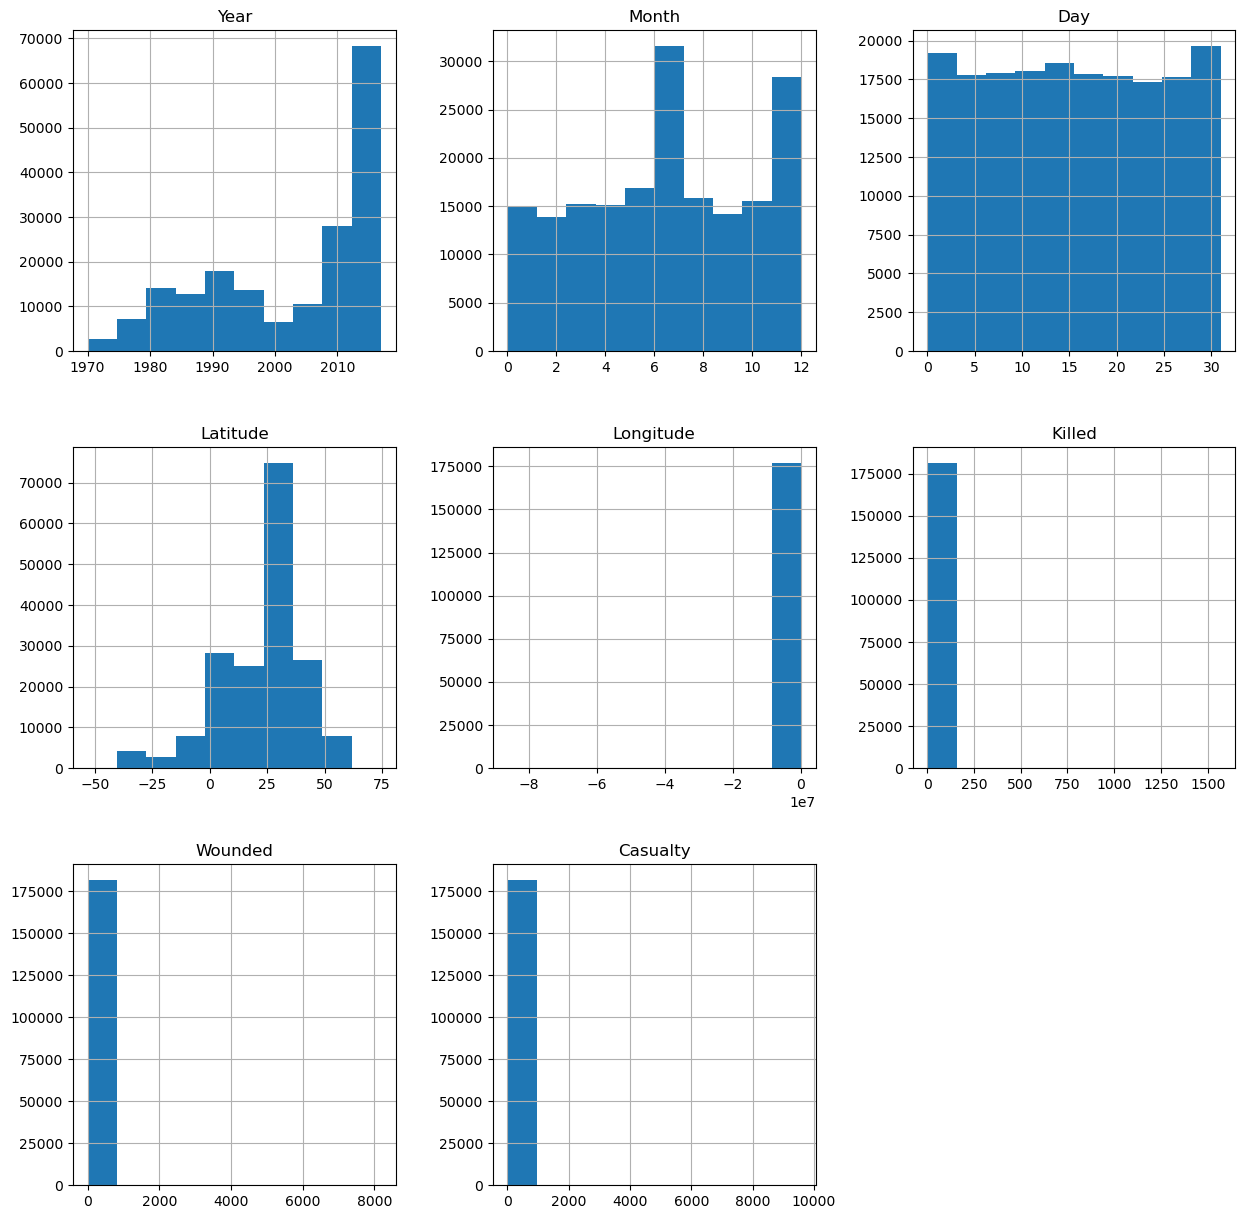

In [26]:
df.hist(figsize=(15,15))
plt.show()

In [27]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


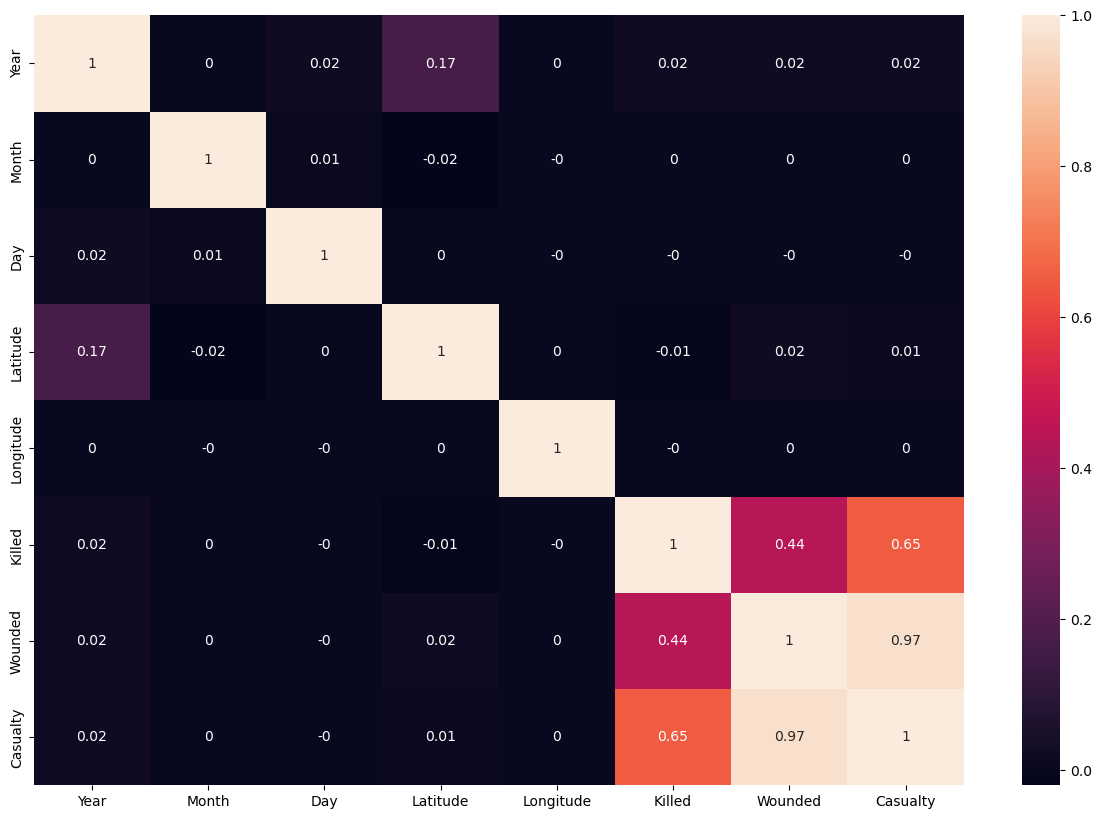

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

#### 1. Number of Attacks in each Year

In [29]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")

In [30]:
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


In [31]:
attacks.tail()

,Attacks
Year,
2013,12036
2014,16903
2015,14965
2016,13587
2017,10900


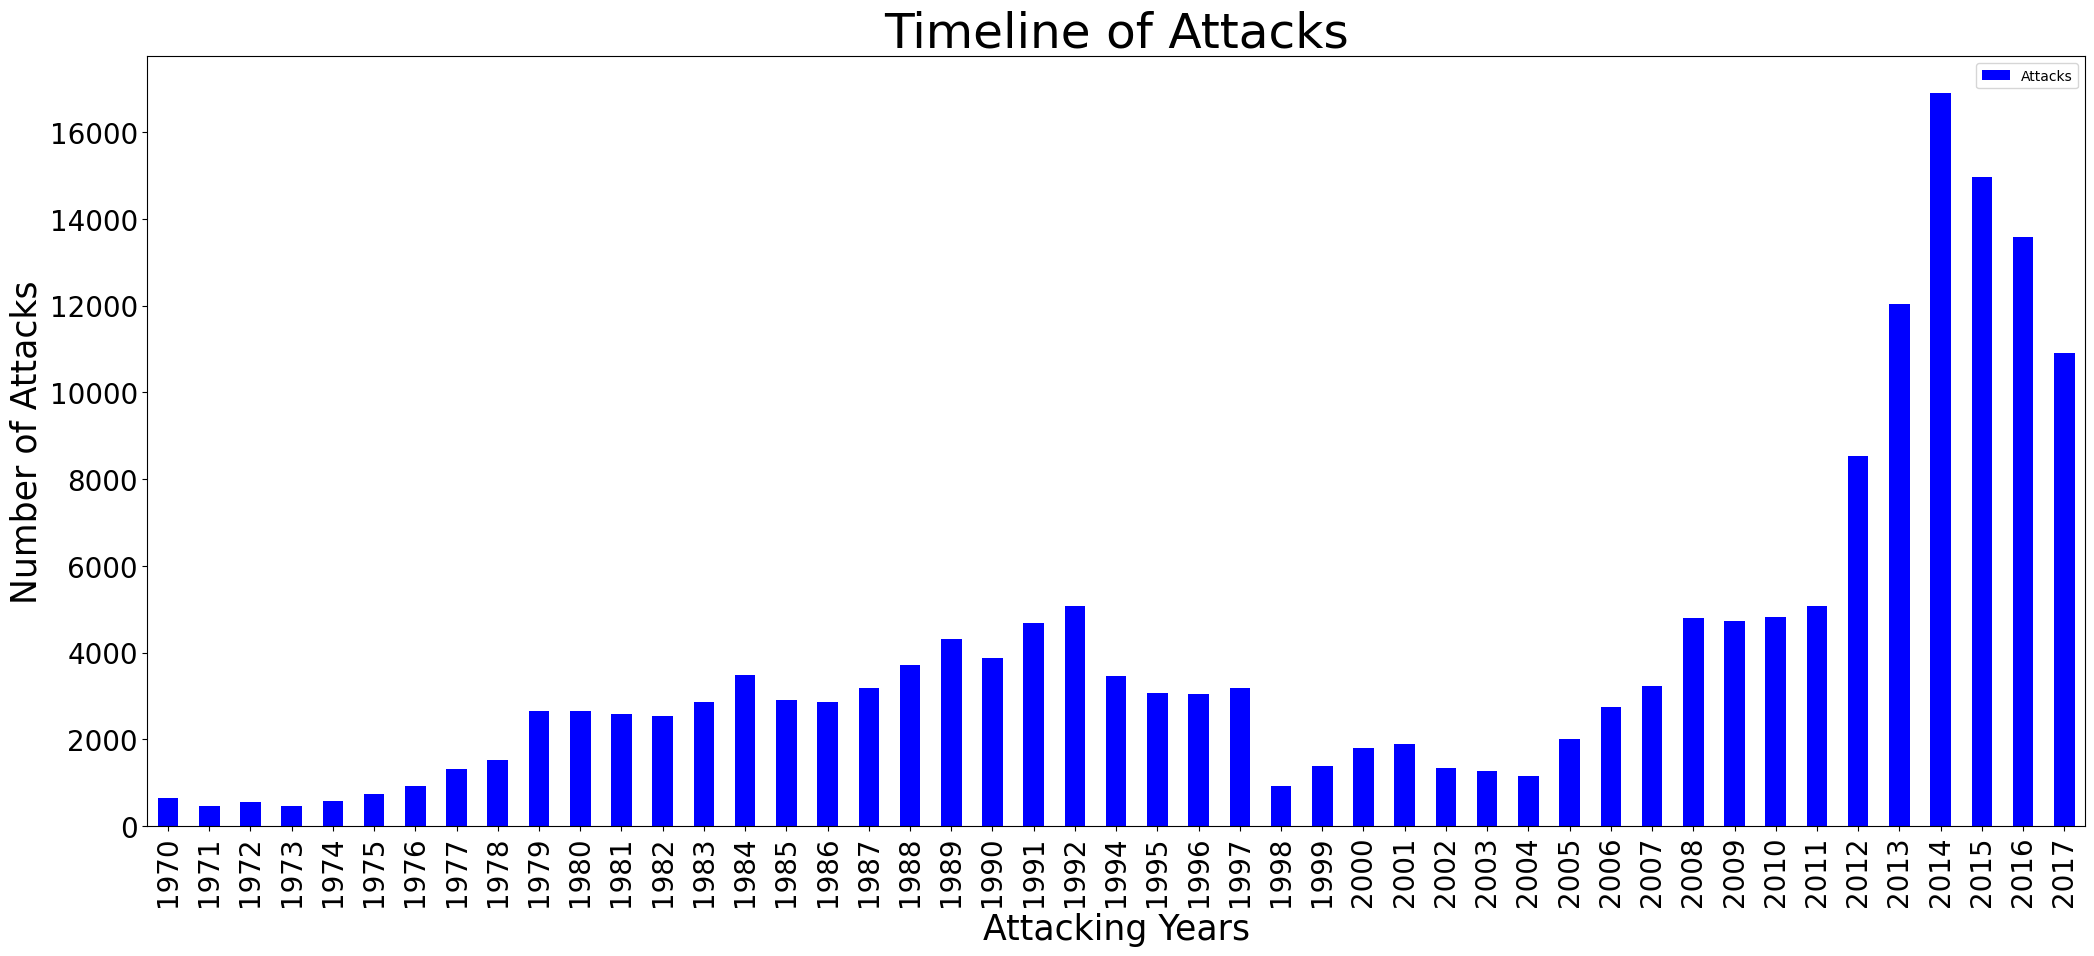

In [32]:
attacks.plot(kind="bar",color="blue",figsize=(25,10),fontsize=20)
plt.title("Timeline of Attacks",fontsize=35)
plt.xlabel("Attacking Years",fontsize=25)
plt.ylabel("Number of Attacks",fontsize=25)
plt.show()

#### Observation
* Most Number of Attacks(16903) in 2014
* Least Number of Attacks(471) in 1970
* Record of 2017 in (10900)

#### 2.Total Casualties (Killed + Wounded) in each Year

In [33]:
yearcas=df[["Year","Casualty"]].groupby("Year").sum()

In [34]:
yearcas.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


In [35]:
yearcas.tail()

,Casualty
Year,
2013,59961.0
2014,85618.0
2015,82896.0
2016,74872.0
2017,51372.0


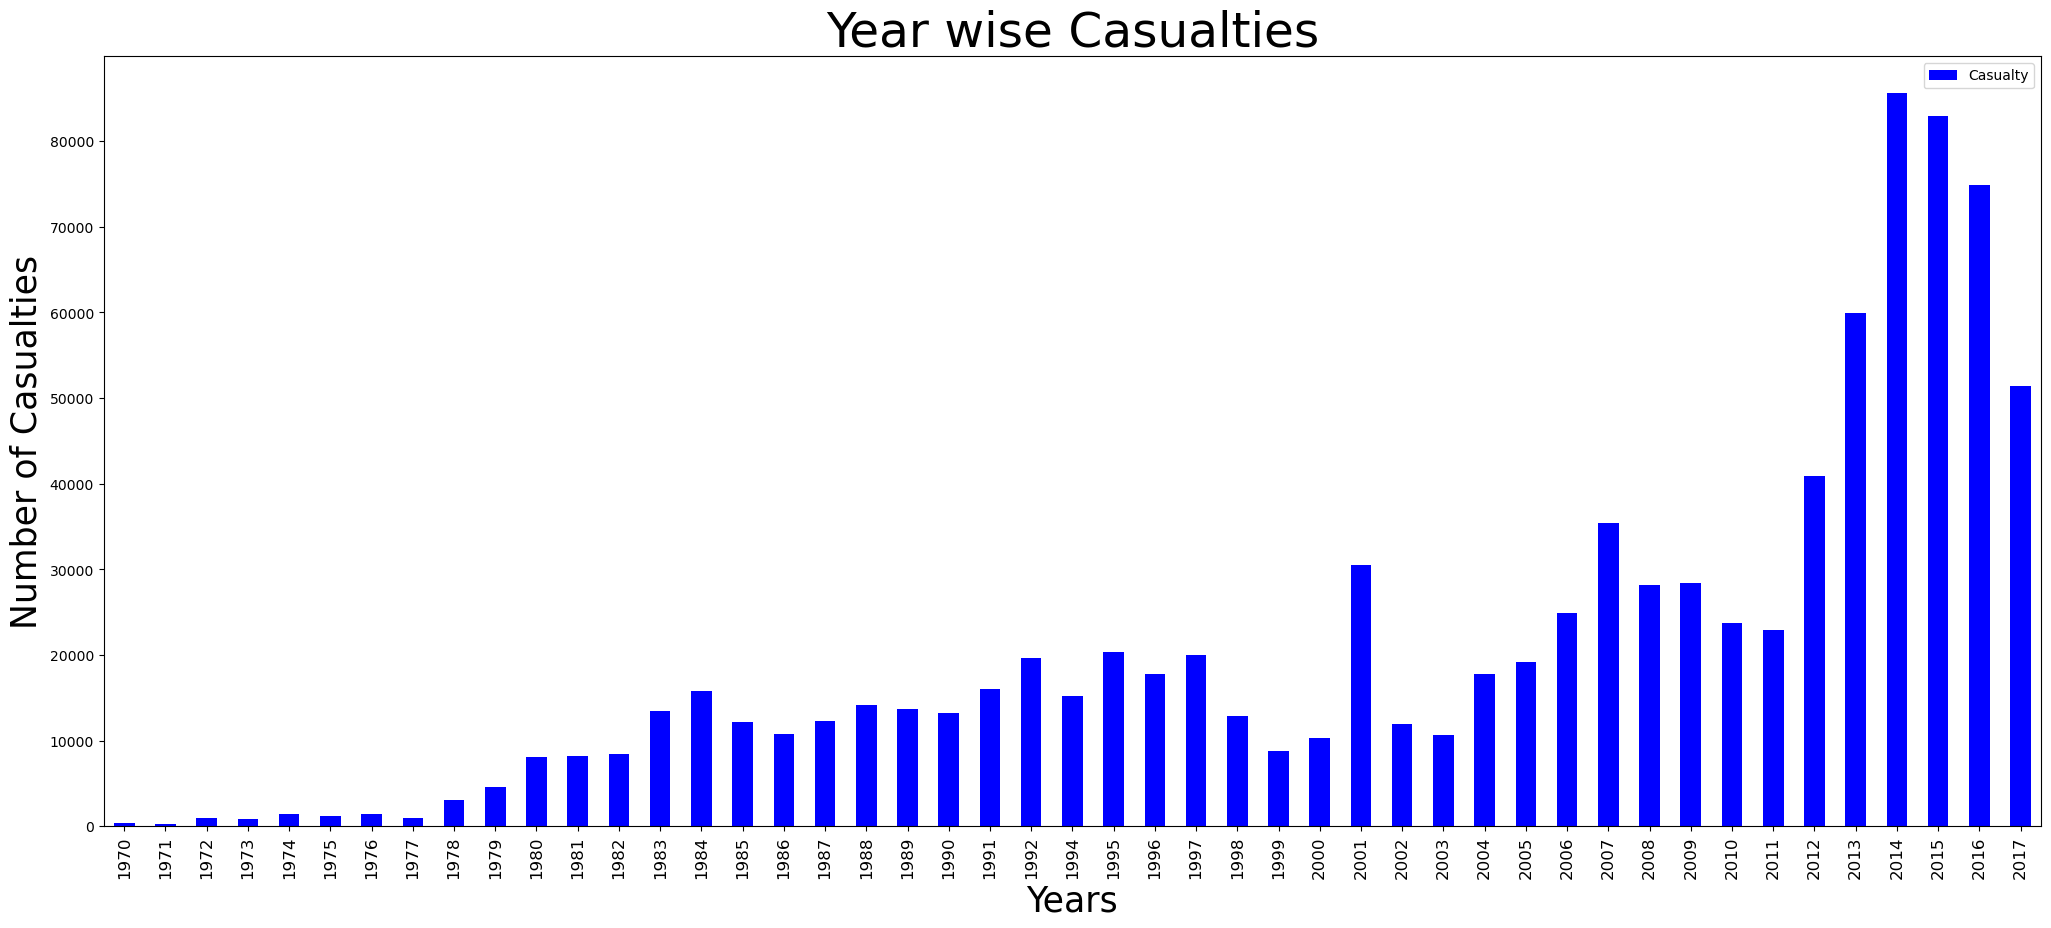

In [36]:
yearcas.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Year wise Casualties",fontsize=35)
plt.xlabel("Years",fontsize=25)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=25)
plt.show()

#### 3.Killed in each Year

In [37]:
yearkill=df[["Year","Killed"]].groupby("Year").sum()

In [38]:
yearkill.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [39]:
yearkill.tail()

,Killed
Year,
2013,22273.0
2014,44490.0
2015,38853.0
2016,34871.0
2017,26445.0


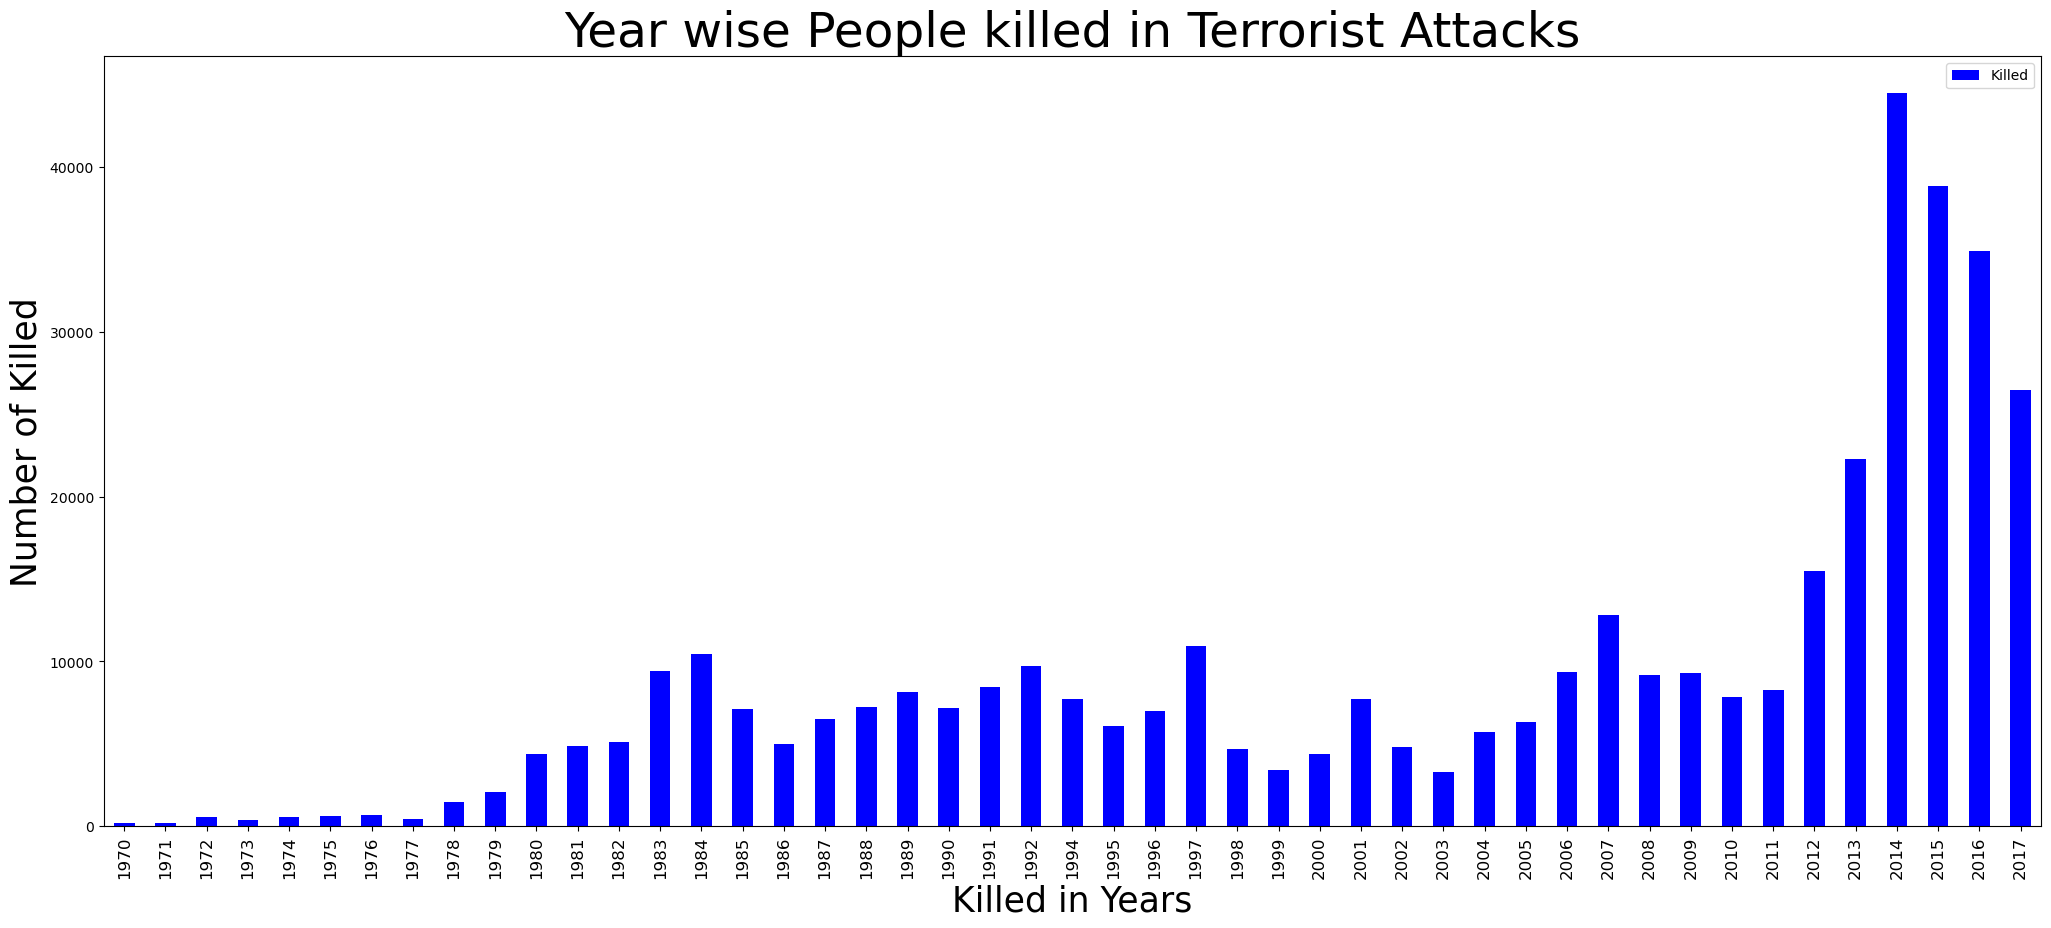

In [40]:
yearkill.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Year wise People killed in Terrorist Attacks",fontsize=35)
plt.xlabel("Killed in Years",fontsize=25)
plt.xticks(fontsize=12)
plt.ylabel("Number of Killed",fontsize=25)
plt.show()

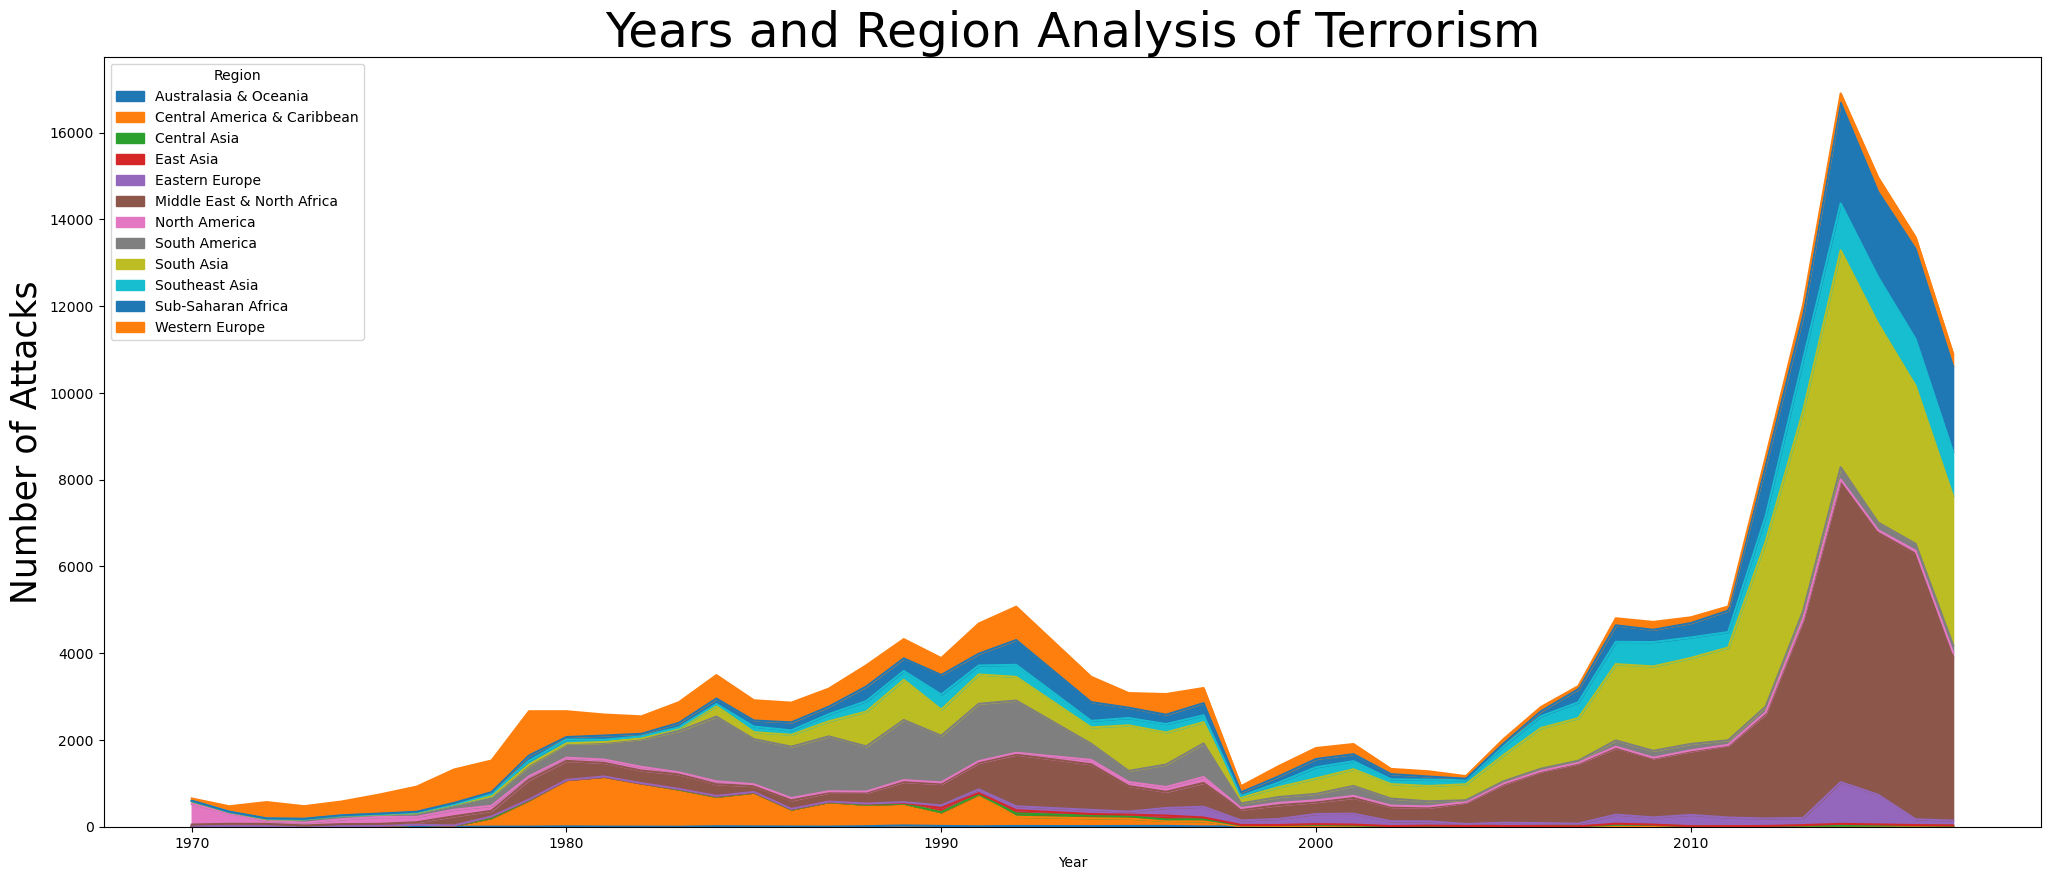

In [41]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(25,10))
plt.title('Years and Region Analysis of Terrorism', fontsize=35)
plt.ylabel('Number of Attacks', fontsize=25)
plt.show()

#### 4.Wounded in each Region

In [42]:
yearwou=df[["Year","Wounded"]].groupby("Year").sum()

In [43]:
yearwou.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


In [44]:
yearwou.tail()

,Wounded
Year,
2013,37688.0
2014,41128.0
2015,44043.0
2016,40001.0
2017,24927.0


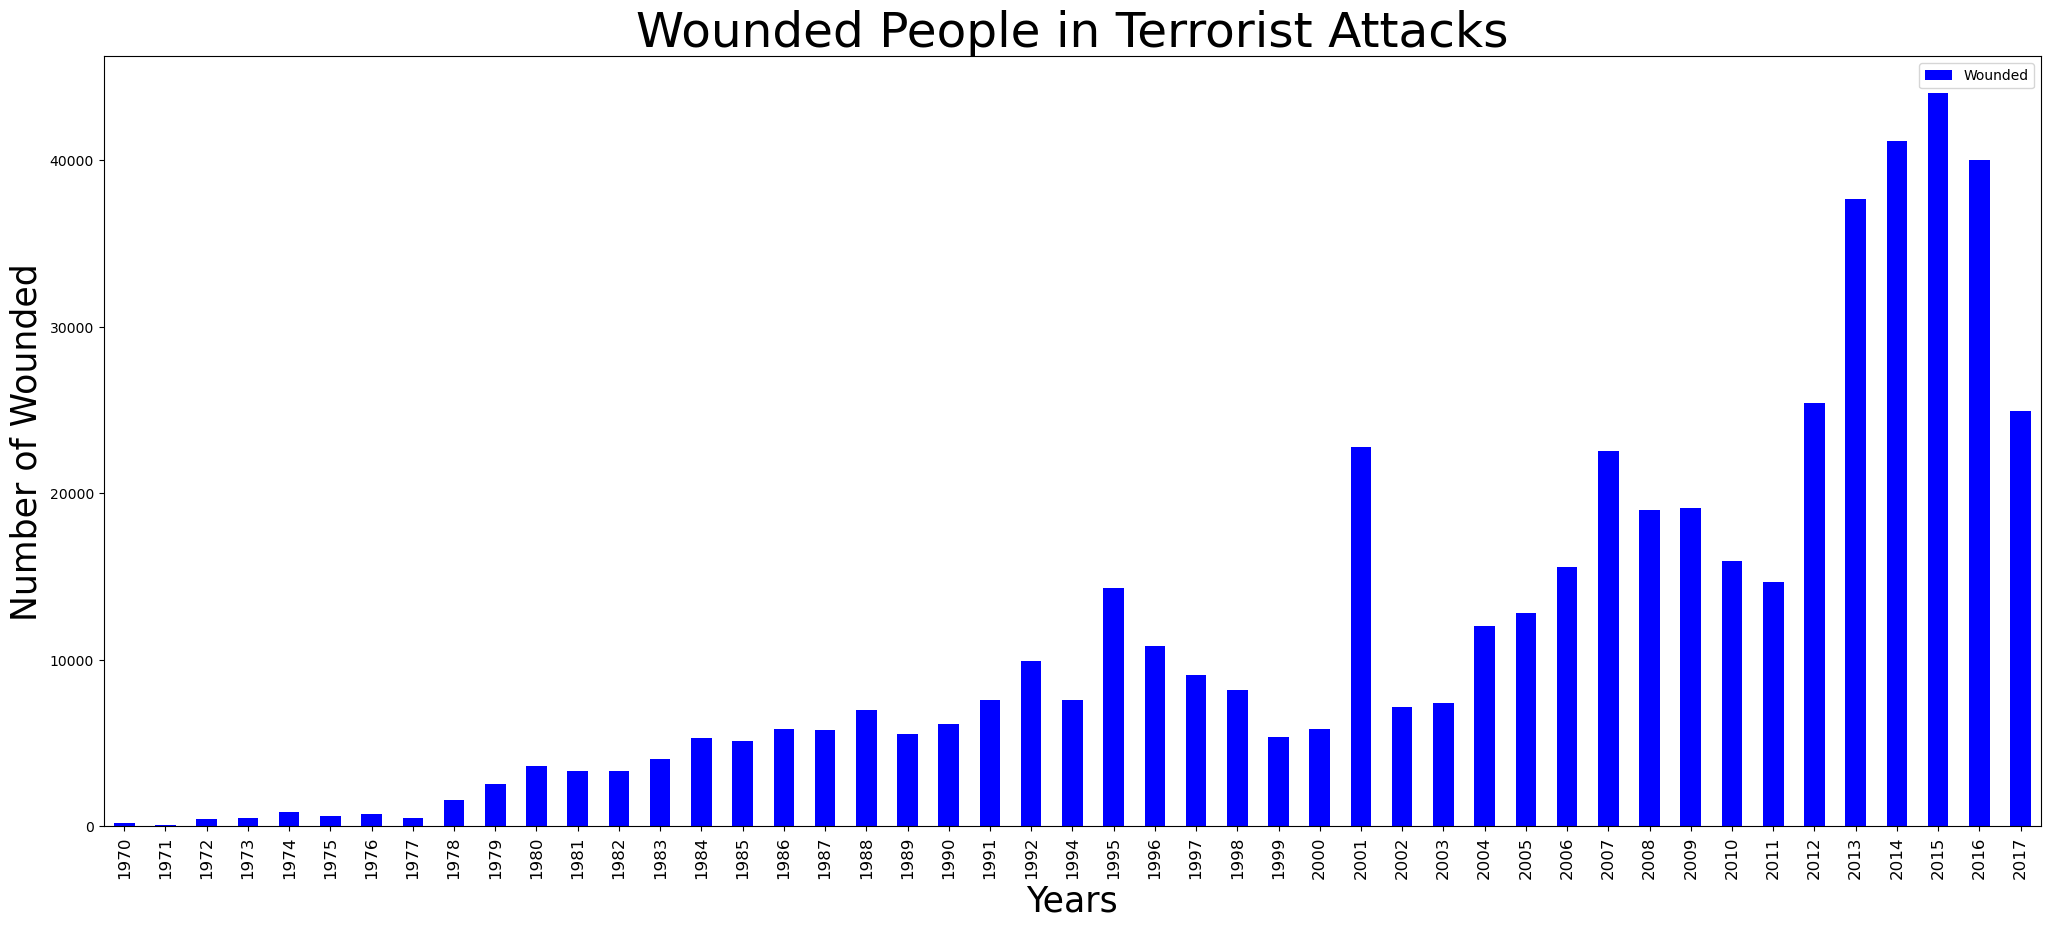

In [45]:
yearwou.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Wounded People in Terrorist Attacks",fontsize=35)
plt.xlabel("Years",fontsize=25)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize=25)
plt.show()

### 2. Region Wise of Attacks in each Year

##### 1.1970 - 2017 Terriorist Attacks in Regions

In [46]:
region=pd.crosstab(df.Year,df.Region)

In [47]:
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


In [48]:
region.tail()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
2013,1,14,7,15,165,4560,32,182,4612,1188,999,261
2014,9,5,9,43,962,6939,37,283,4998,1082,2321,215
2015,14,1,10,28,684,6036,62,176,4585,1072,1964,333
2016,10,3,17,8,134,6115,75,159,3639,1077,2077,273
2017,12,4,7,7,110,3780,97,172,3430,1020,1970,291


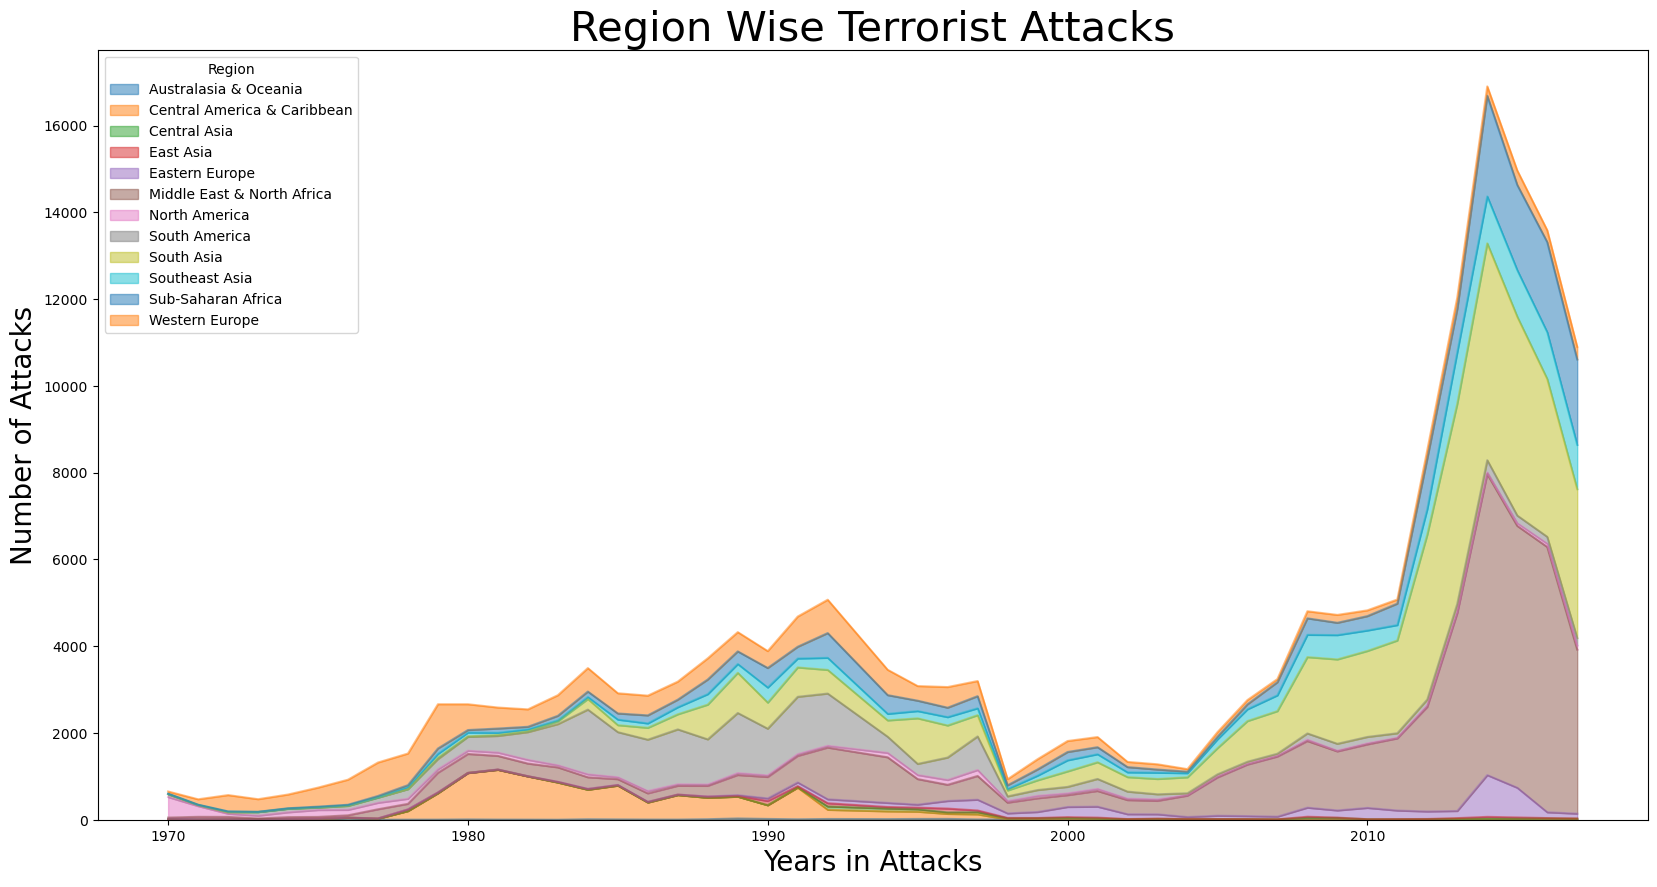

In [49]:
region.plot(kind="area", stacked=True, alpha=0.5,figsize=(20,10))
plt.title("Region Wise Terrorist Attacks",fontsize=30)
plt.xlabel("Years in Attacks",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

#### 2. 1970 - 2017 Total Terrorist Attacks in each Region

In [50]:
# transpose data 
regiontal=region.transpose()

In [51]:
regiontal["Total"]=regiontal.sum(axis=1)

In [52]:
regionattack=regiontal["Total"].sort_values(ascending=False)

In [53]:
regionattack

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

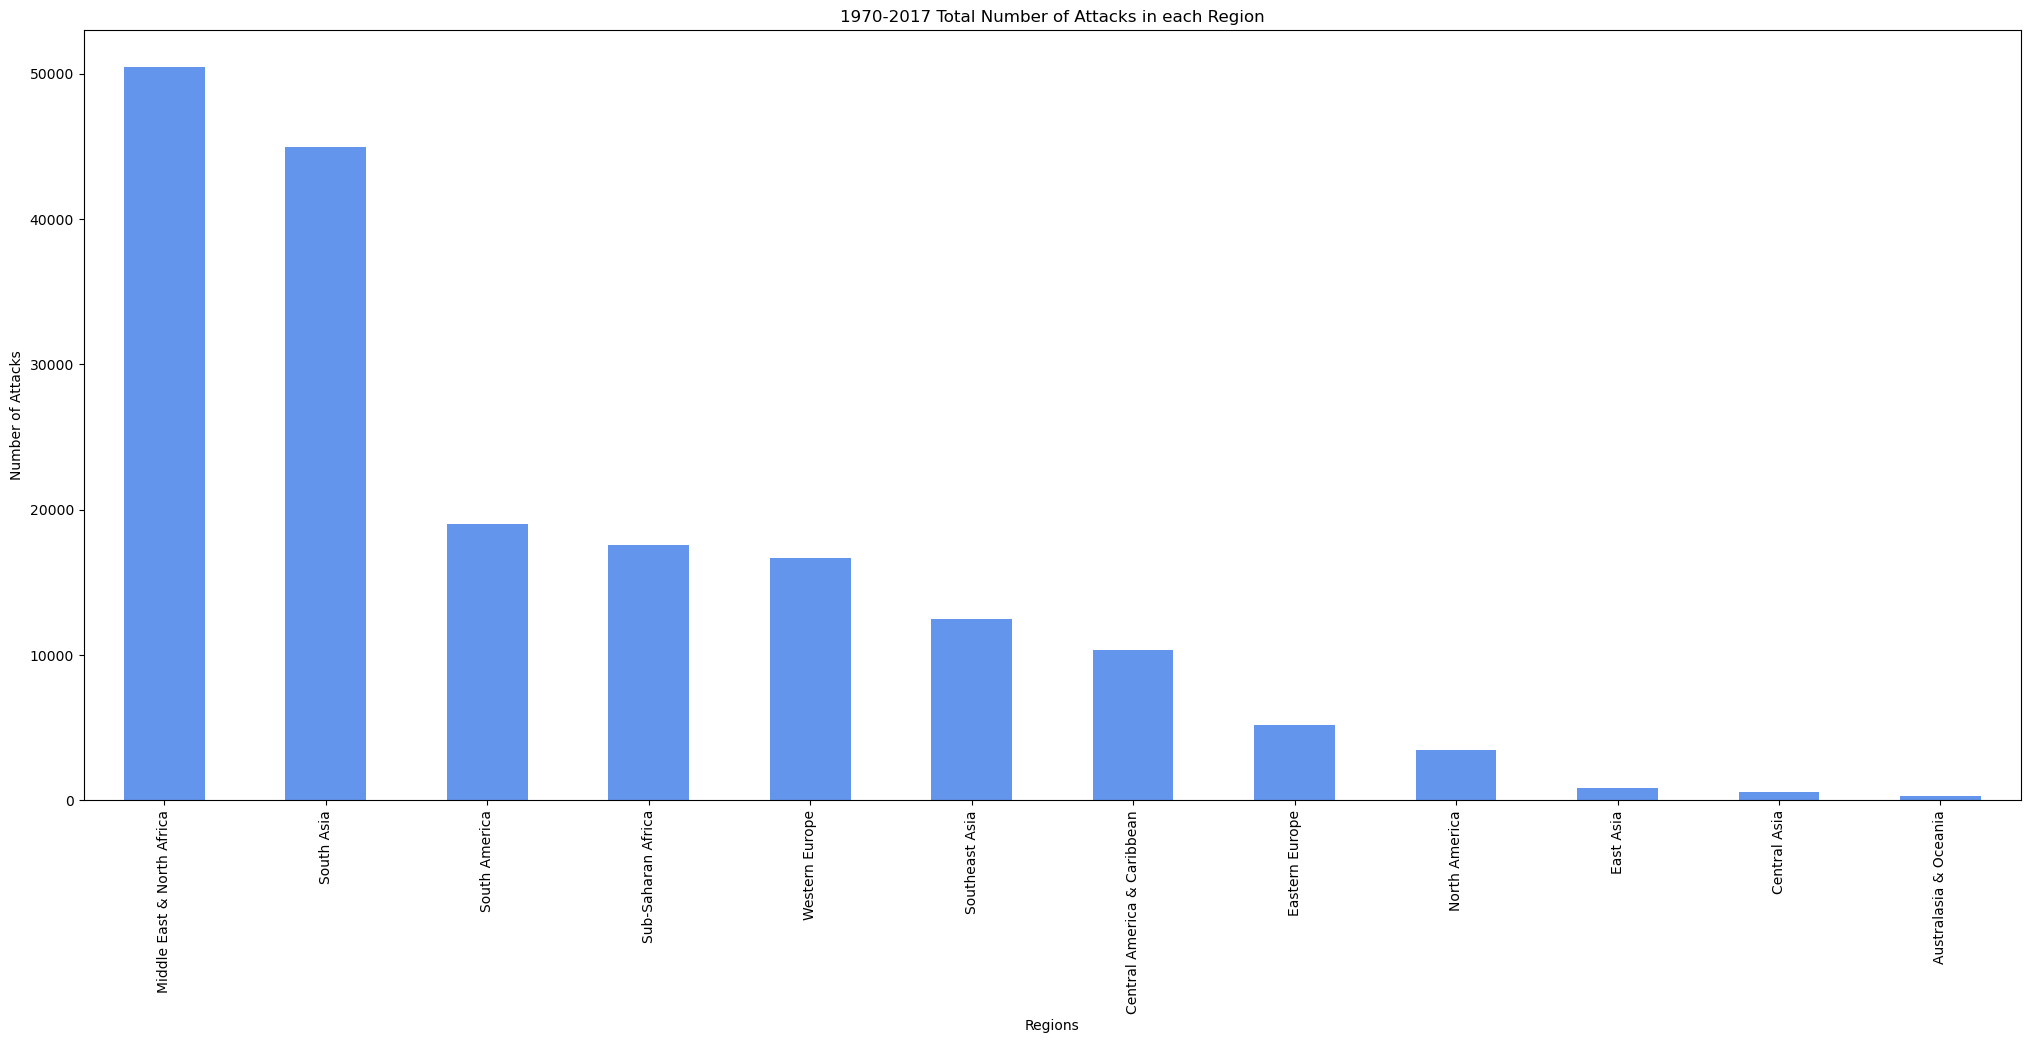

In [54]:
regionattack.plot(kind="bar",color='cornflowerblue',figsize=(25,10))
plt.title("1970-2017 Total Number of Attacks in each Region")
plt.xlabel("Regions")
plt.ylabel("Number of Attacks")
plt.show()

#### 3.In Each Region Total Casualties of Killed and Wounded People

In [55]:
regcas=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)

In [56]:
regcas.head()

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0


In [57]:
regcas.tail()

,Casualty
Region,
Western Europe,25026.0
Eastern Europe,19460.0
East Asia,10365.0
Central Asia,3009.0
Australasia & Oceania,410.0


In [58]:
regcas

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


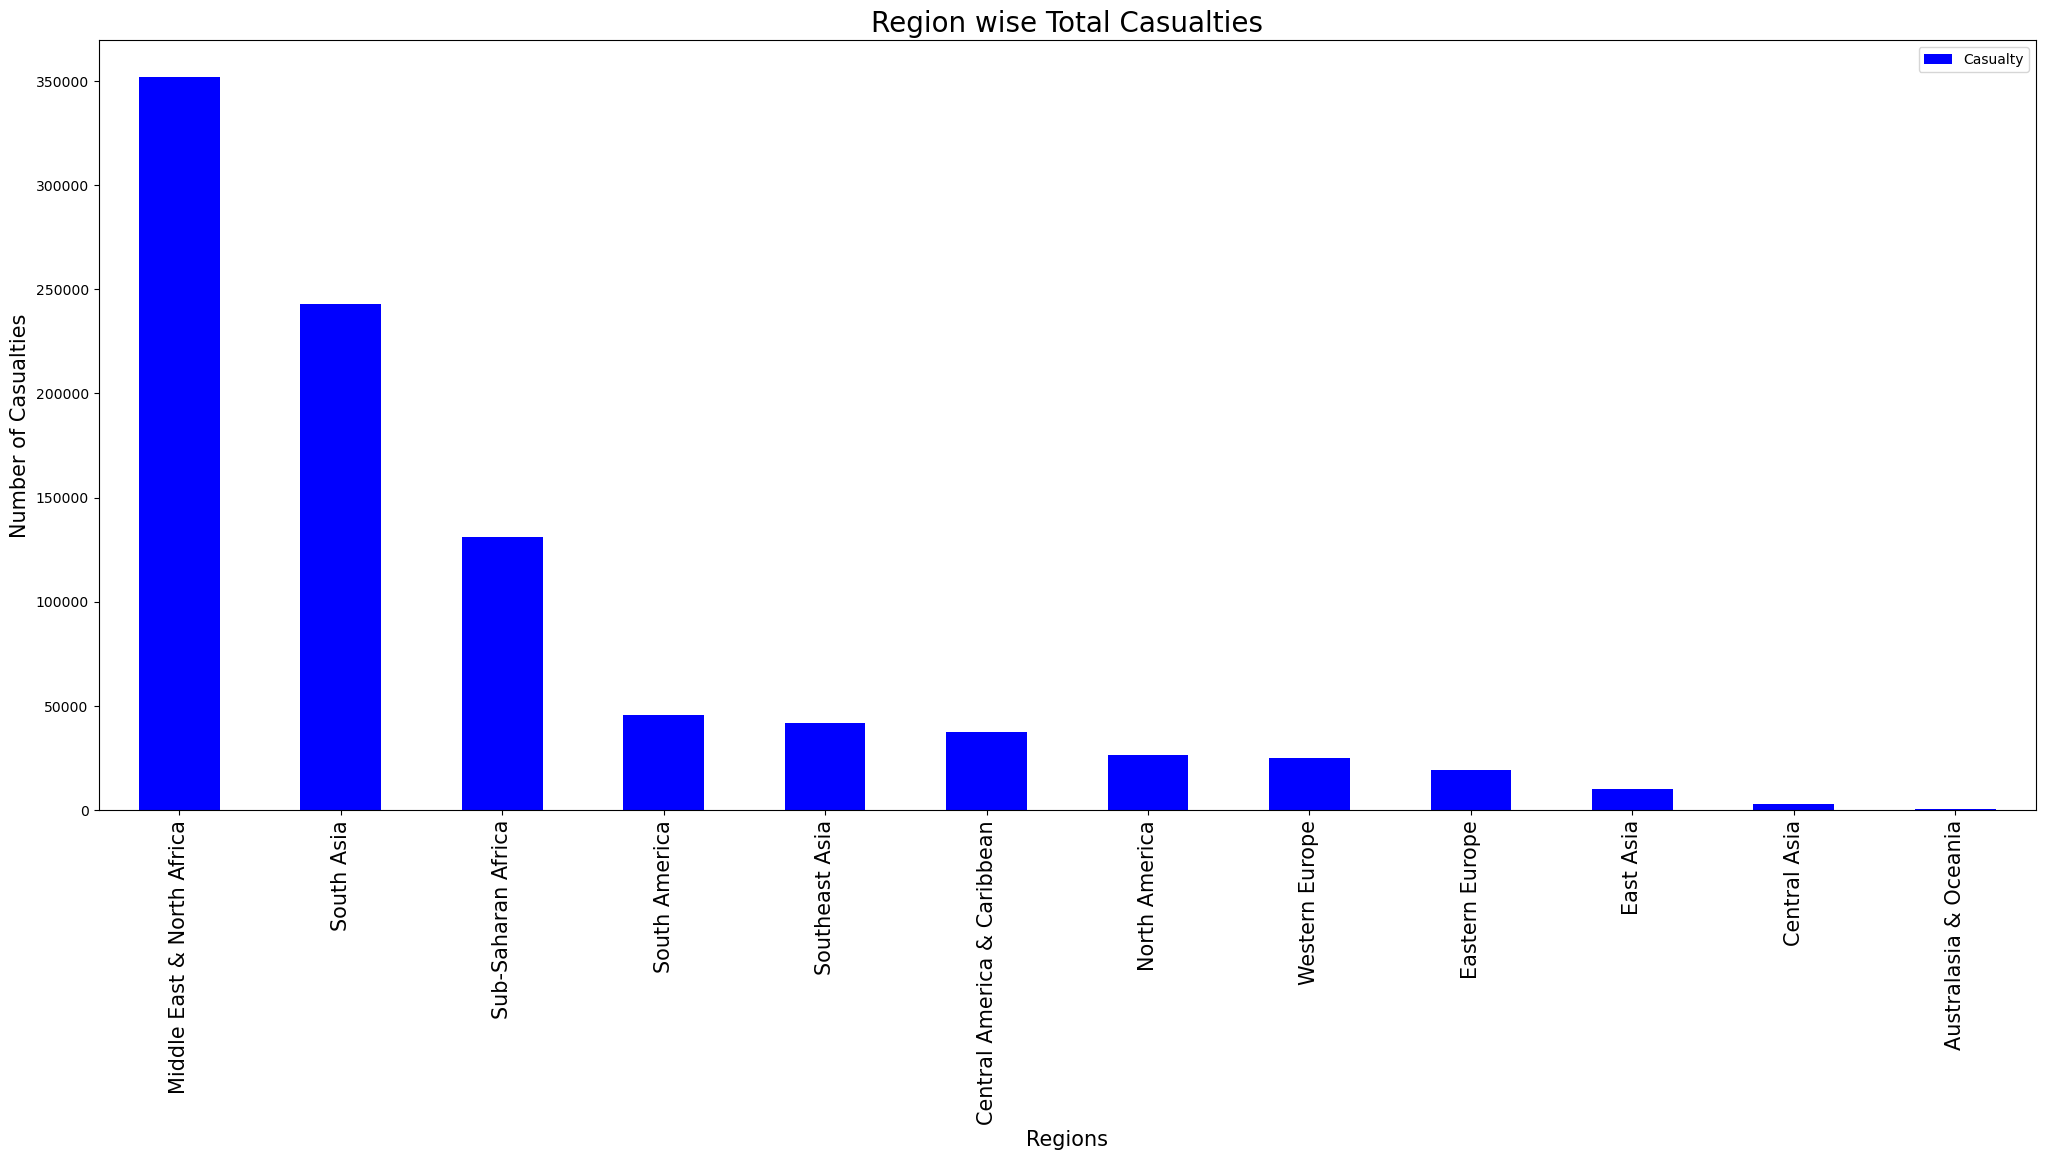

In [59]:
regcas.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Region wise Total Casualties",fontsize=20)
plt.xlabel("Regions",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()


#### 4.People Killed in Each Region

In [60]:
regkilled=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)

In [61]:
regkilled.head()

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0


In [62]:
regkilled.tail()

,Killed
Region,
Western Europe,6694.0
North America,4916.0
East Asia,1152.0
Central Asia,1000.0
Australasia & Oceania,150.0


In [63]:
regkilled

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


#### 5.People Wounded in Each Region

In [64]:
regwn=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)

In [65]:
regwn.head()

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0


In [66]:
regwn.tail()

,Wounded
Region,
Eastern Europe,12045.0
East Asia,9213.0
Central America & Caribbean,8991.0
Central Asia,2009.0
Australasia & Oceania,260.0


In [67]:
regwn

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


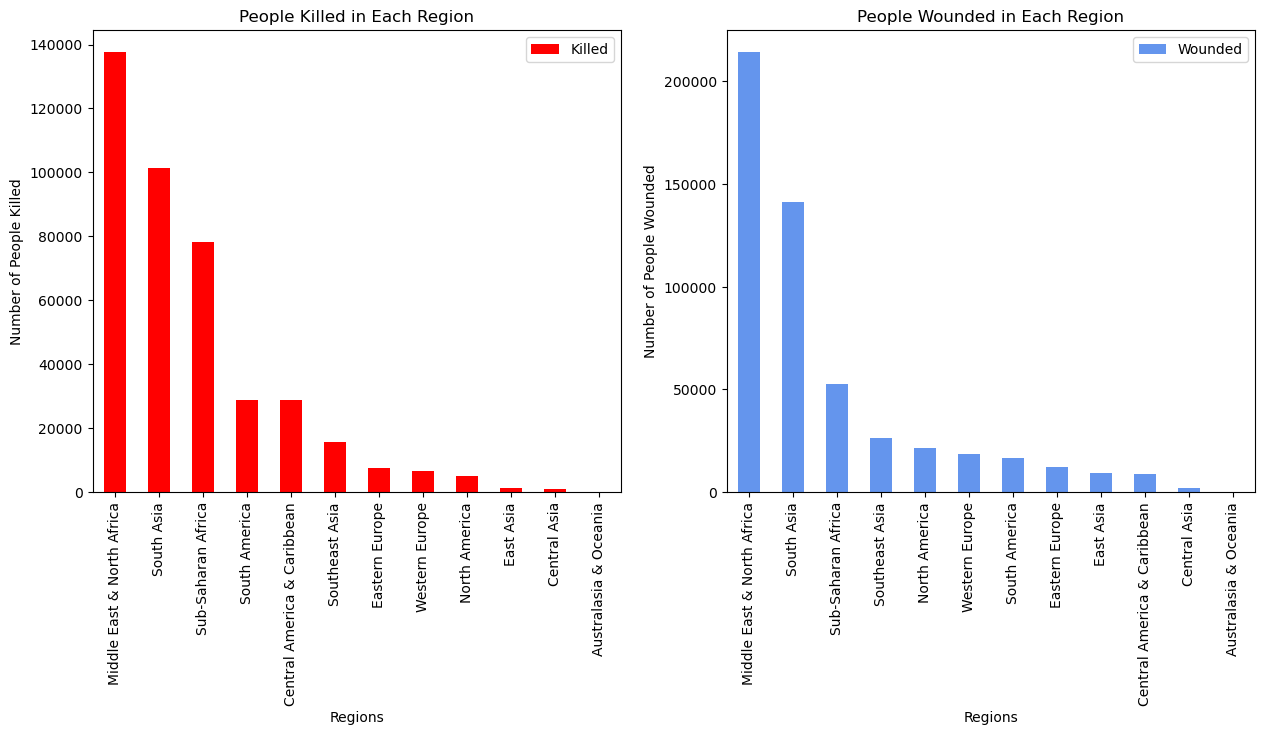

In [68]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
regkilled.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in Each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
regwn.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in Each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 3. Country wise Terrorist Attacks

#### 1.Number of Terrorist Attacks in Each Country

In [69]:
counter=df["Country"].value_counts()

In [70]:
counter.head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

In [71]:
counter.tail()

International          1
Wallis and Futuna      1
South Vietnam          1
Andorra                1
Antigua and Barbuda    1
Name: Country, dtype: int64

In [72]:
counter

Iraq                                24636
Pakistan                            14368
Afghanistan                         12731
India                               11960
Colombia                             8306
Philippines                          6908
Peru                                 6096
El Salvador                          5320
United Kingdom                       5235
Turkey                               4292
Somalia                              4142
Nigeria                              3907
Thailand                             3849
Yemen                                3347
Spain                                3249
Sri Lanka                            3022
United States                        2836
Algeria                              2743
France                               2693
Egypt                                2479
Lebanon                              2478
Chile                                2365
Libya                                2249
West Bank and Gaza Strip          

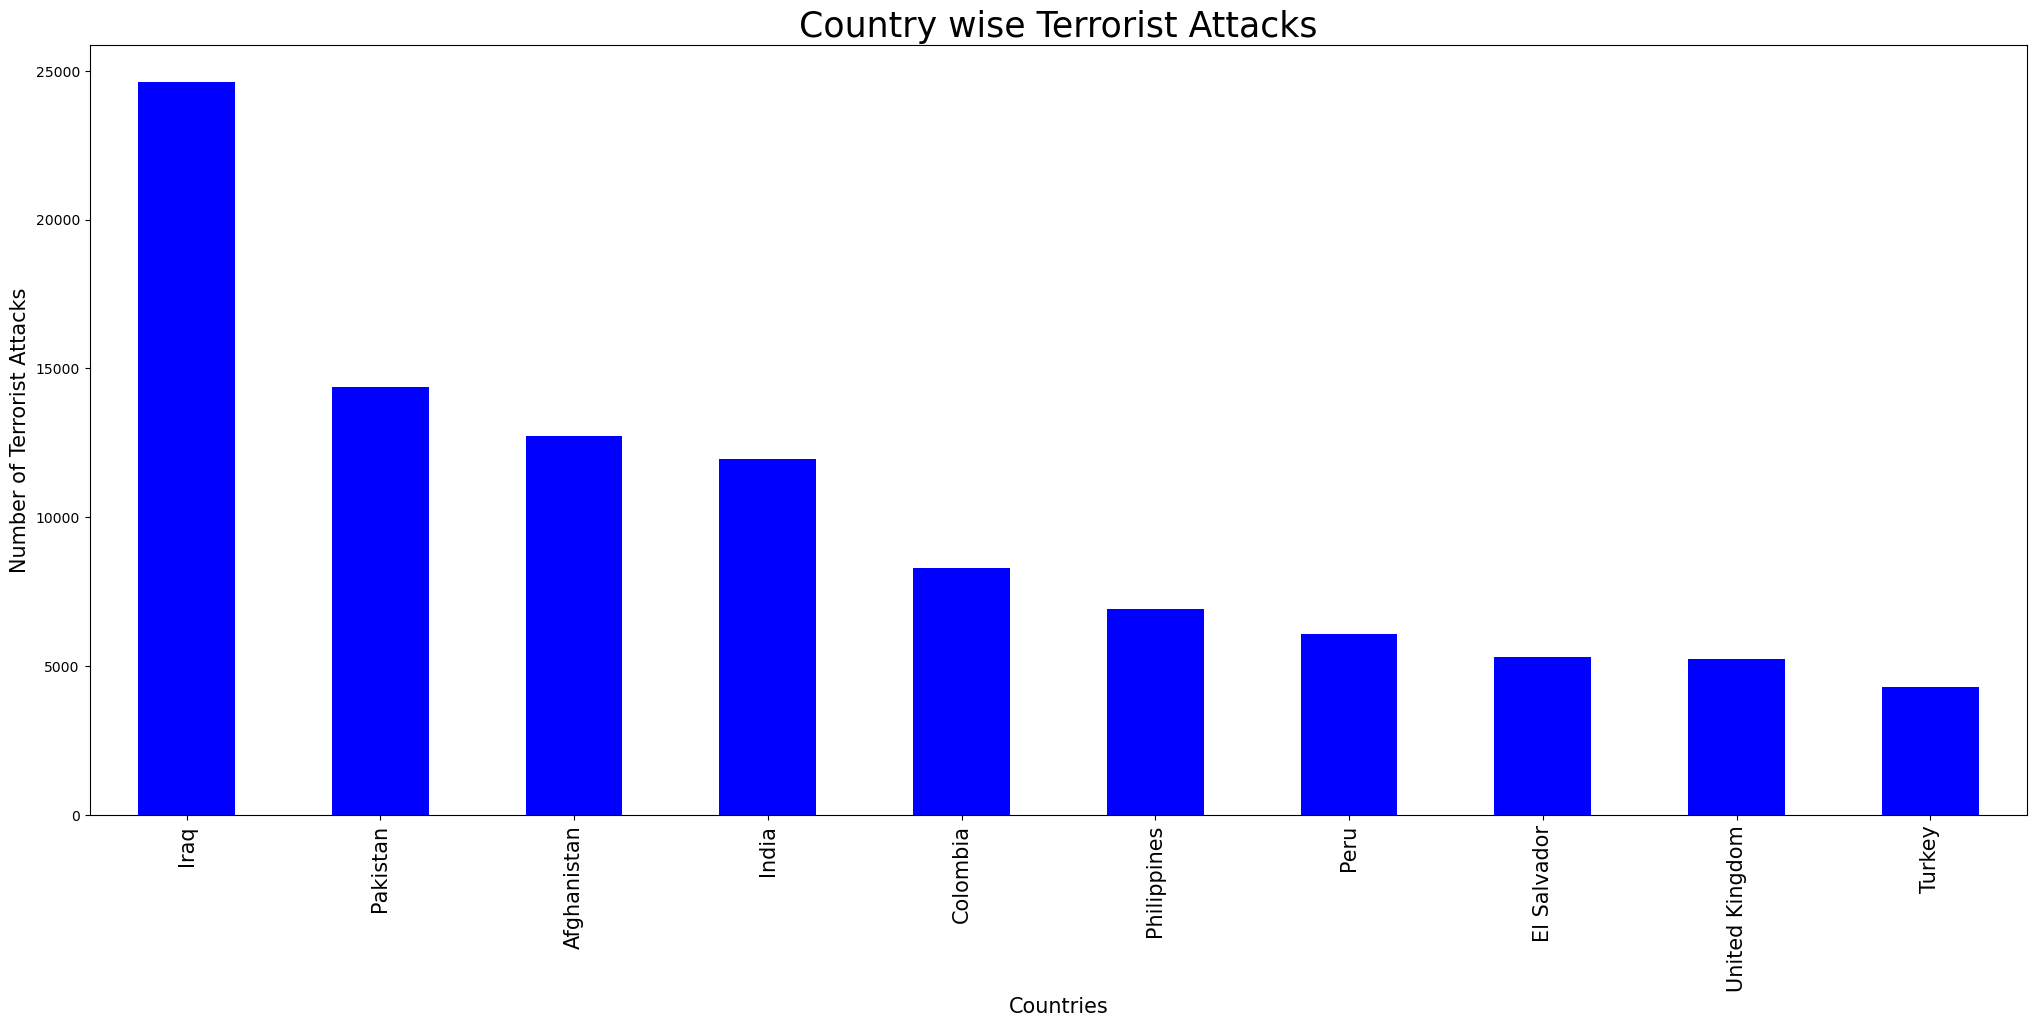

In [73]:
counter.head(10).plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Country wise Terrorist Attacks",fontsize=25)
plt.xlabel("Countries",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Terrorist Attacks",fontsize=15)
plt.show()


#### 3.Number People Killed in Each Country

In [74]:
counkil=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)

In [75]:
counkil.head()

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0


In [76]:
counkil.tail()

,Killed
Country,
St. Kitts and Nevis,0.0
Martinique,0.0
Brunei,0.0
Iceland,0.0
South Yemen,0.0


In [78]:
counkil

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


#### 4.People Wounded in Each Country

In [79]:
counwun=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)

In [80]:
counwun.head()

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0


In [81]:
counwun.tail()

,Wounded
Country,
Bahamas,0.0
South Vietnam,0.0
Montenegro,0.0
Falkland Islands,0.0
Iceland,0.0


In [82]:
counwun

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


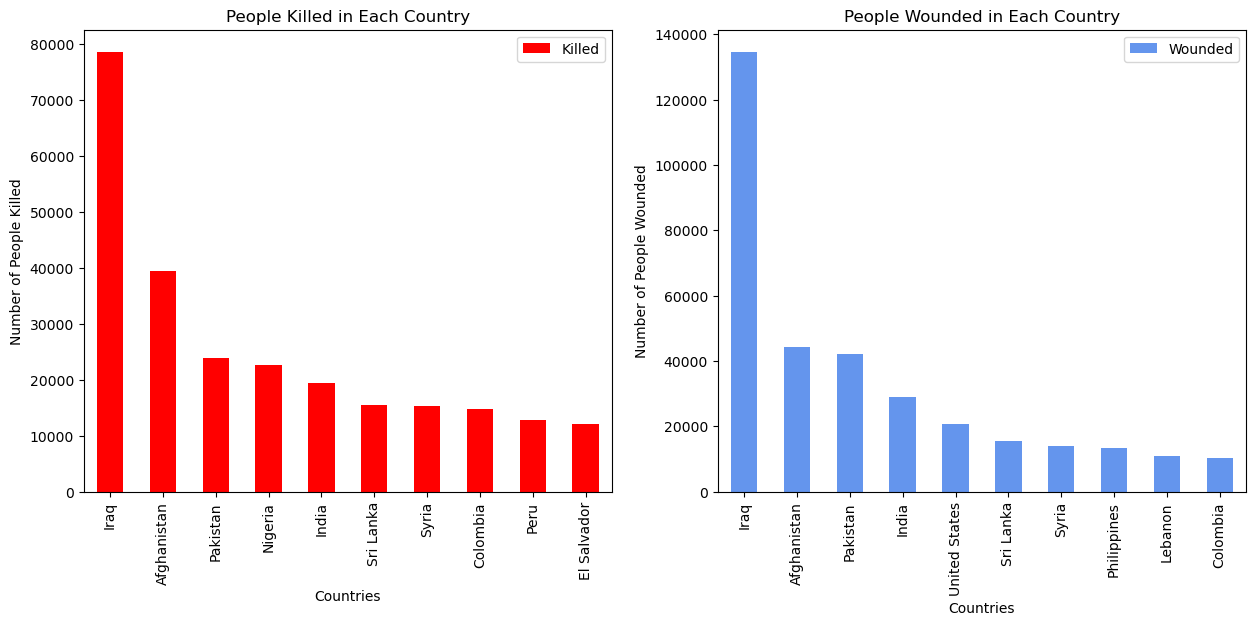

In [83]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
counkil[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in Each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
counwun[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in Each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 4. City Wise Terrorist Attacks

#### 1.Number of Terrorist Attacks in Each City

In [85]:
city=df["City"].value_counts()[1:11]

In [86]:
city.head()

Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Belfast    2171
Name: City, dtype: int64

In [87]:
city.tail()

Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

In [88]:
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

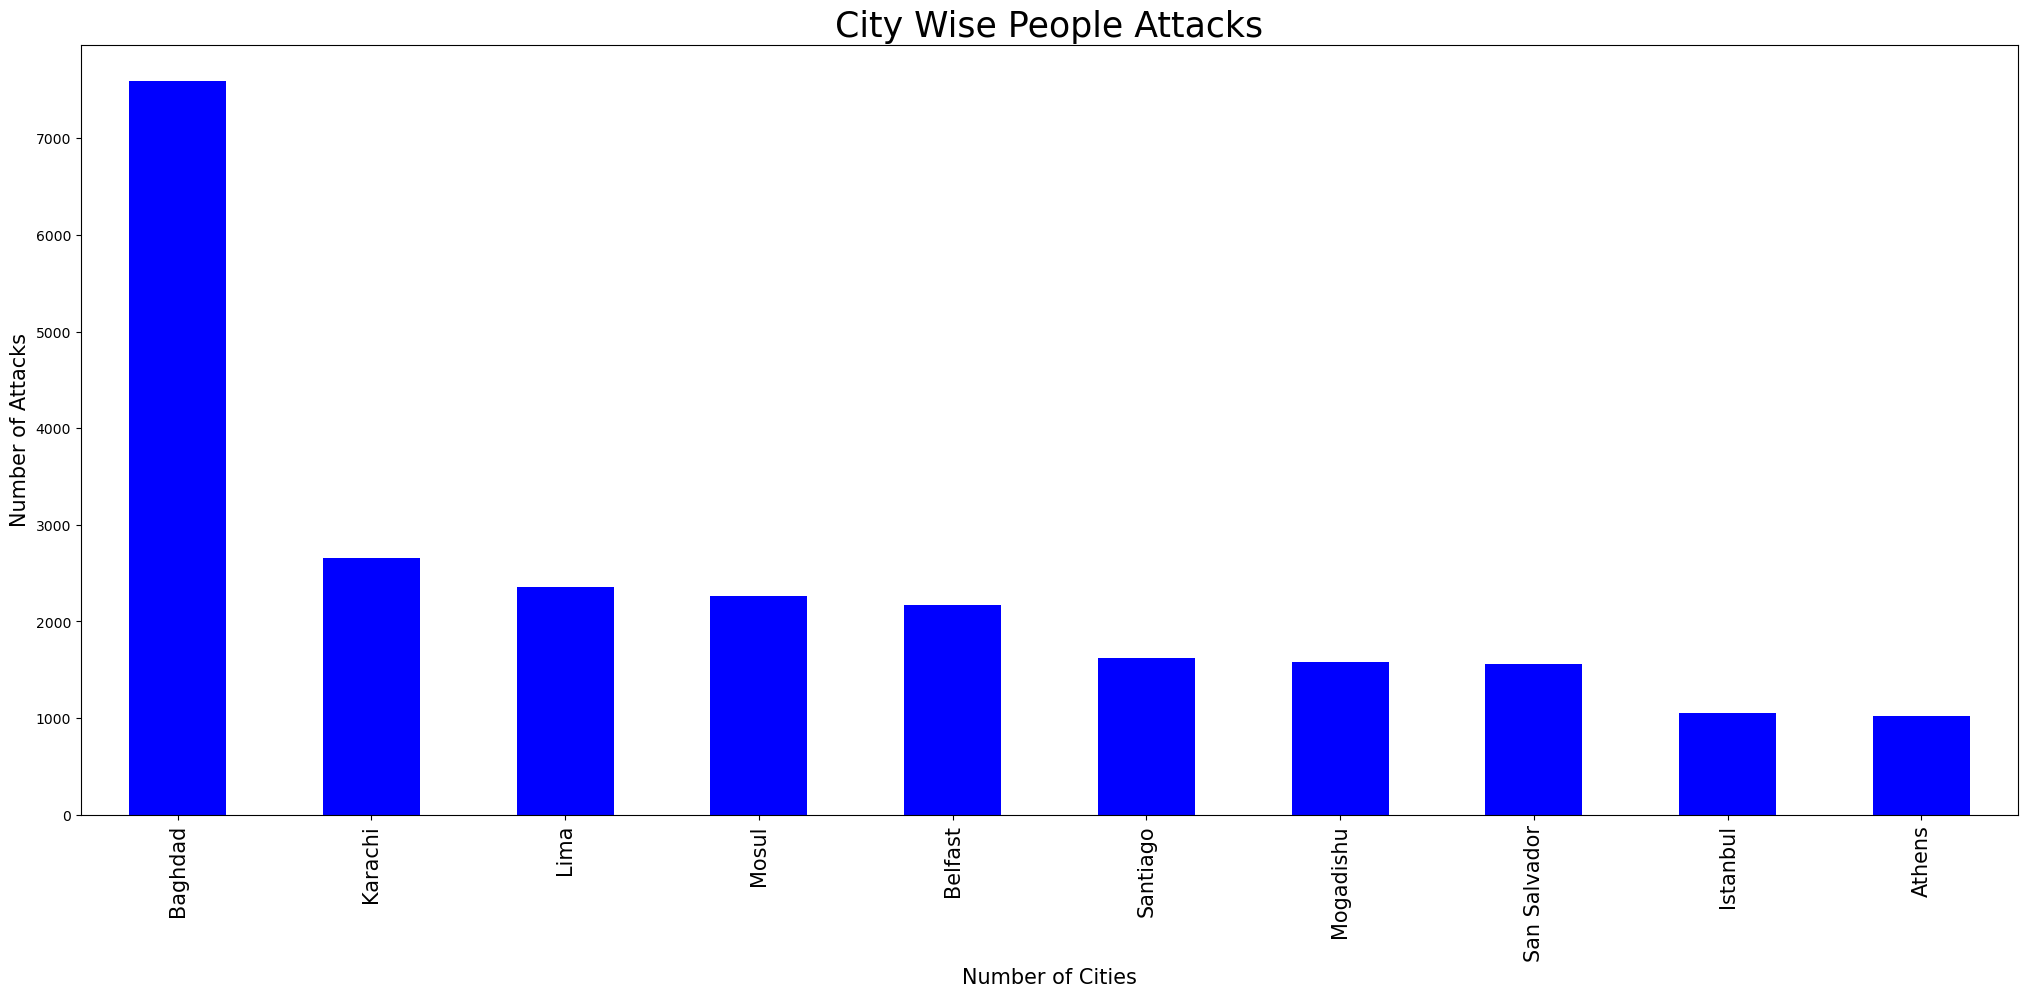

In [89]:
city.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("City Wise People Attacks",fontsize=25)
plt.xlabel("Number of Cities",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

#### 2.Total People Casualties (Killed + Wounded) in Each City

In [90]:
citycas=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")

In [91]:
citycas.head()

,Casualty
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0


In [92]:
citycas.tail()

,Casualty
City,
Divandarreh,0.0
Diva,0.0
Padaiya,0.0
Padalangala,0.0
zinarag,0.0


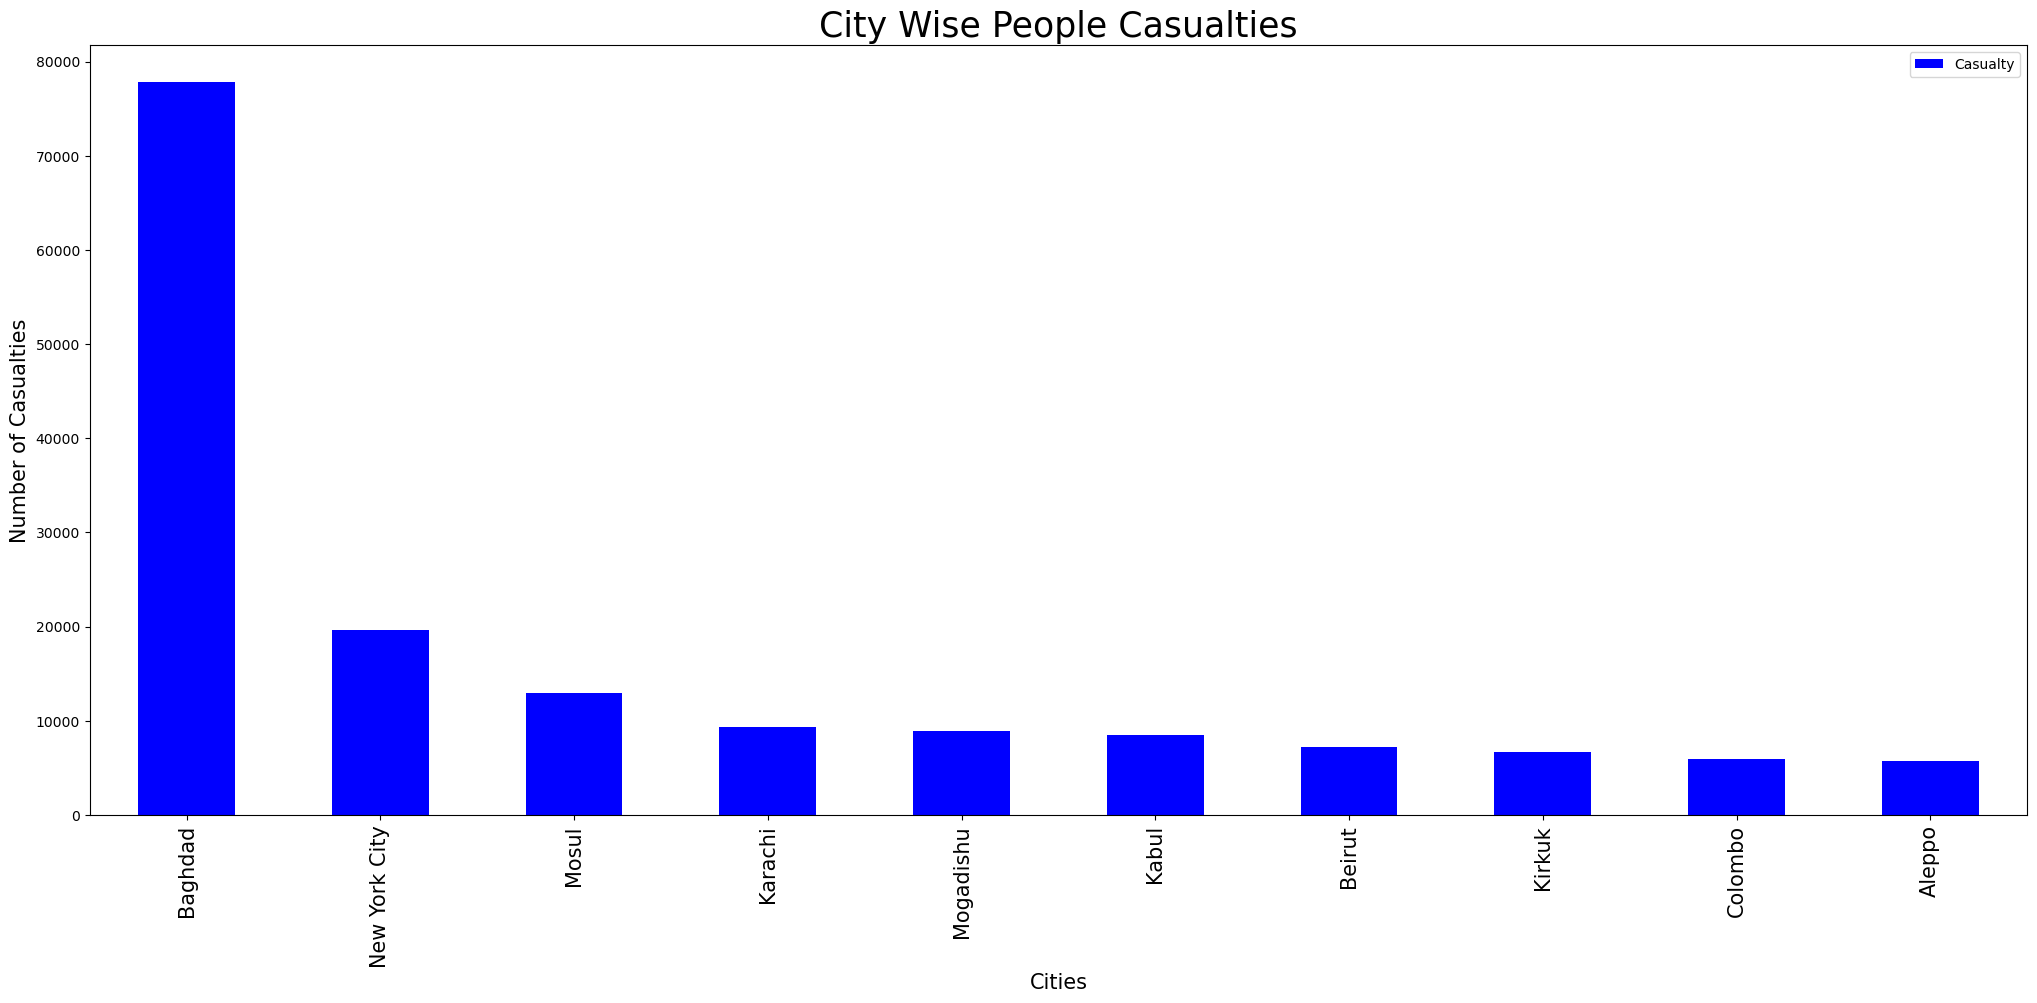

In [93]:
citycas[:10].plot(kind="bar",color="blue",figsize=(25,10))
plt.title("City Wise People Casualties",fontsize=25)
plt.xlabel("Cities",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

#### 3.People Killed in Each City

In [94]:
peocit=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")

In [95]:
peocit.head()

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0


In [96]:
peocit.tail()

,Killed
City,
Mohib Banda,0.0
Mohill,0.0
Chapai Nawabganj,0.0
Chapaguri,0.0
zinarag,0.0


#### 4.People Wounded in Each City

In [97]:
peowou=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")

In [98]:
peowou.head()

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0


In [99]:
peowou.tail()

,Wounded
City,
Kalaong,0.0
Kalantra,0.0
Kalangar,0.0
Kalanch,0.0
zinarag,0.0


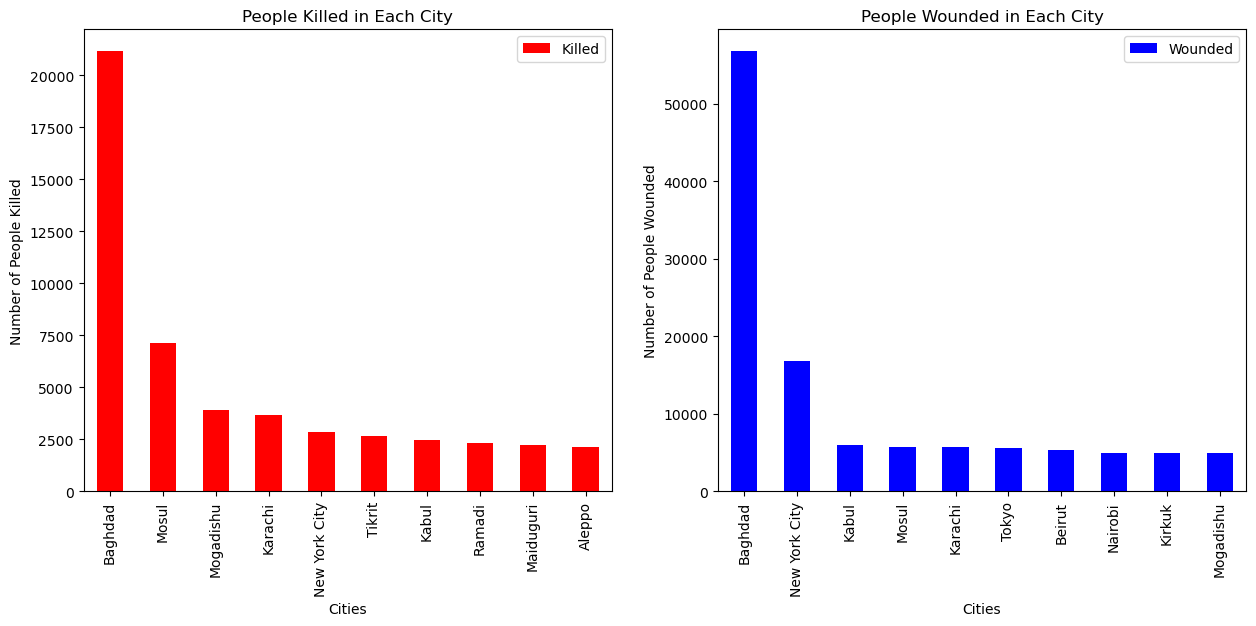

In [100]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
peocit[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in Each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
peowou[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in Each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 5. Terrorist Group wise Attacks

#### 1.Number of Terrorist Attacks by Each Group

In [102]:
grpnme=df["Group Name"].value_counts()[1:10]

In [103]:
grpnme.head()

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
Name: Group Name, dtype: int64

In [104]:
grpnme.tail()

Al-Shabaab                                       3288
New People's Army (NPA)                          2772
Irish Republican Army (IRA)                      2671
Revolutionary Armed Forces of Colombia (FARC)    2487
Boko Haram                                       2418
Name: Group Name, dtype: int64

In [105]:
grpnme

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

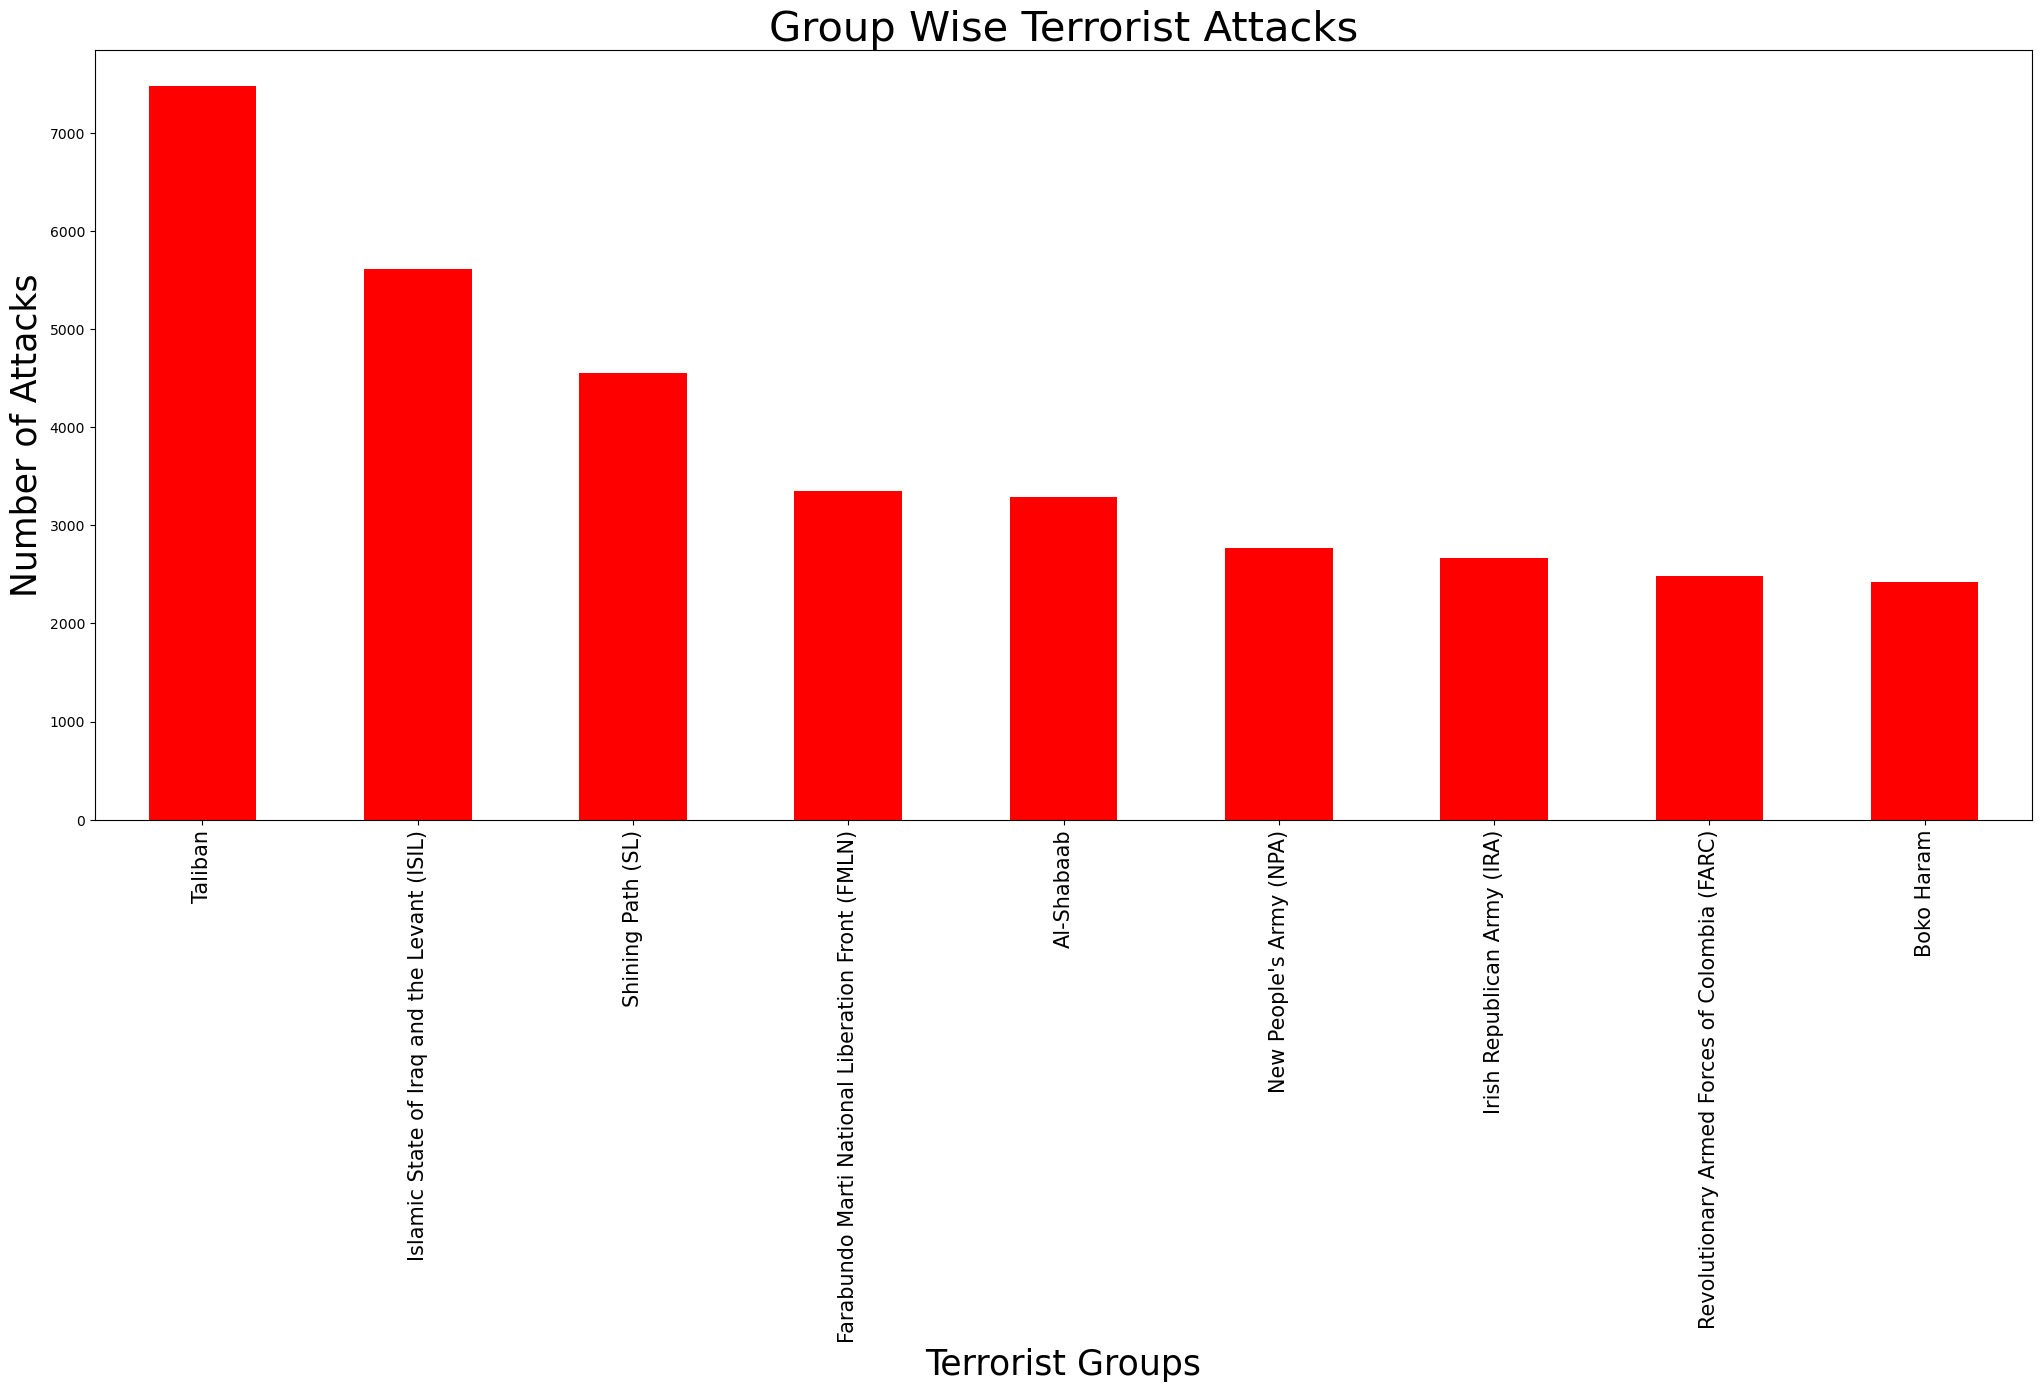

In [106]:
grpnme.plot(kind="bar",color="red",figsize=(25,10))
plt.title("Group Wise Terrorist Attacks",fontsize=30)
plt.xlabel("Terrorist Groups",fontsize=25)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=25)
plt.show()

#### 2.Total Casualties(Killed + Wounded) by Each Group

In [107]:
grpcas=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")

In [108]:
grpcas.head()

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0


In [109]:
grpcas.tail()

,Casualty
Group Name,
Popular Revolutionary Action,0.0
Popular Resistance Sabotage Group,0.0
Force Etudiante Critique,0.0
Forces for the Unification of the Central African Republic (FIRCA),0.0
leftist guerrillas-Bolivarian militia,0.0


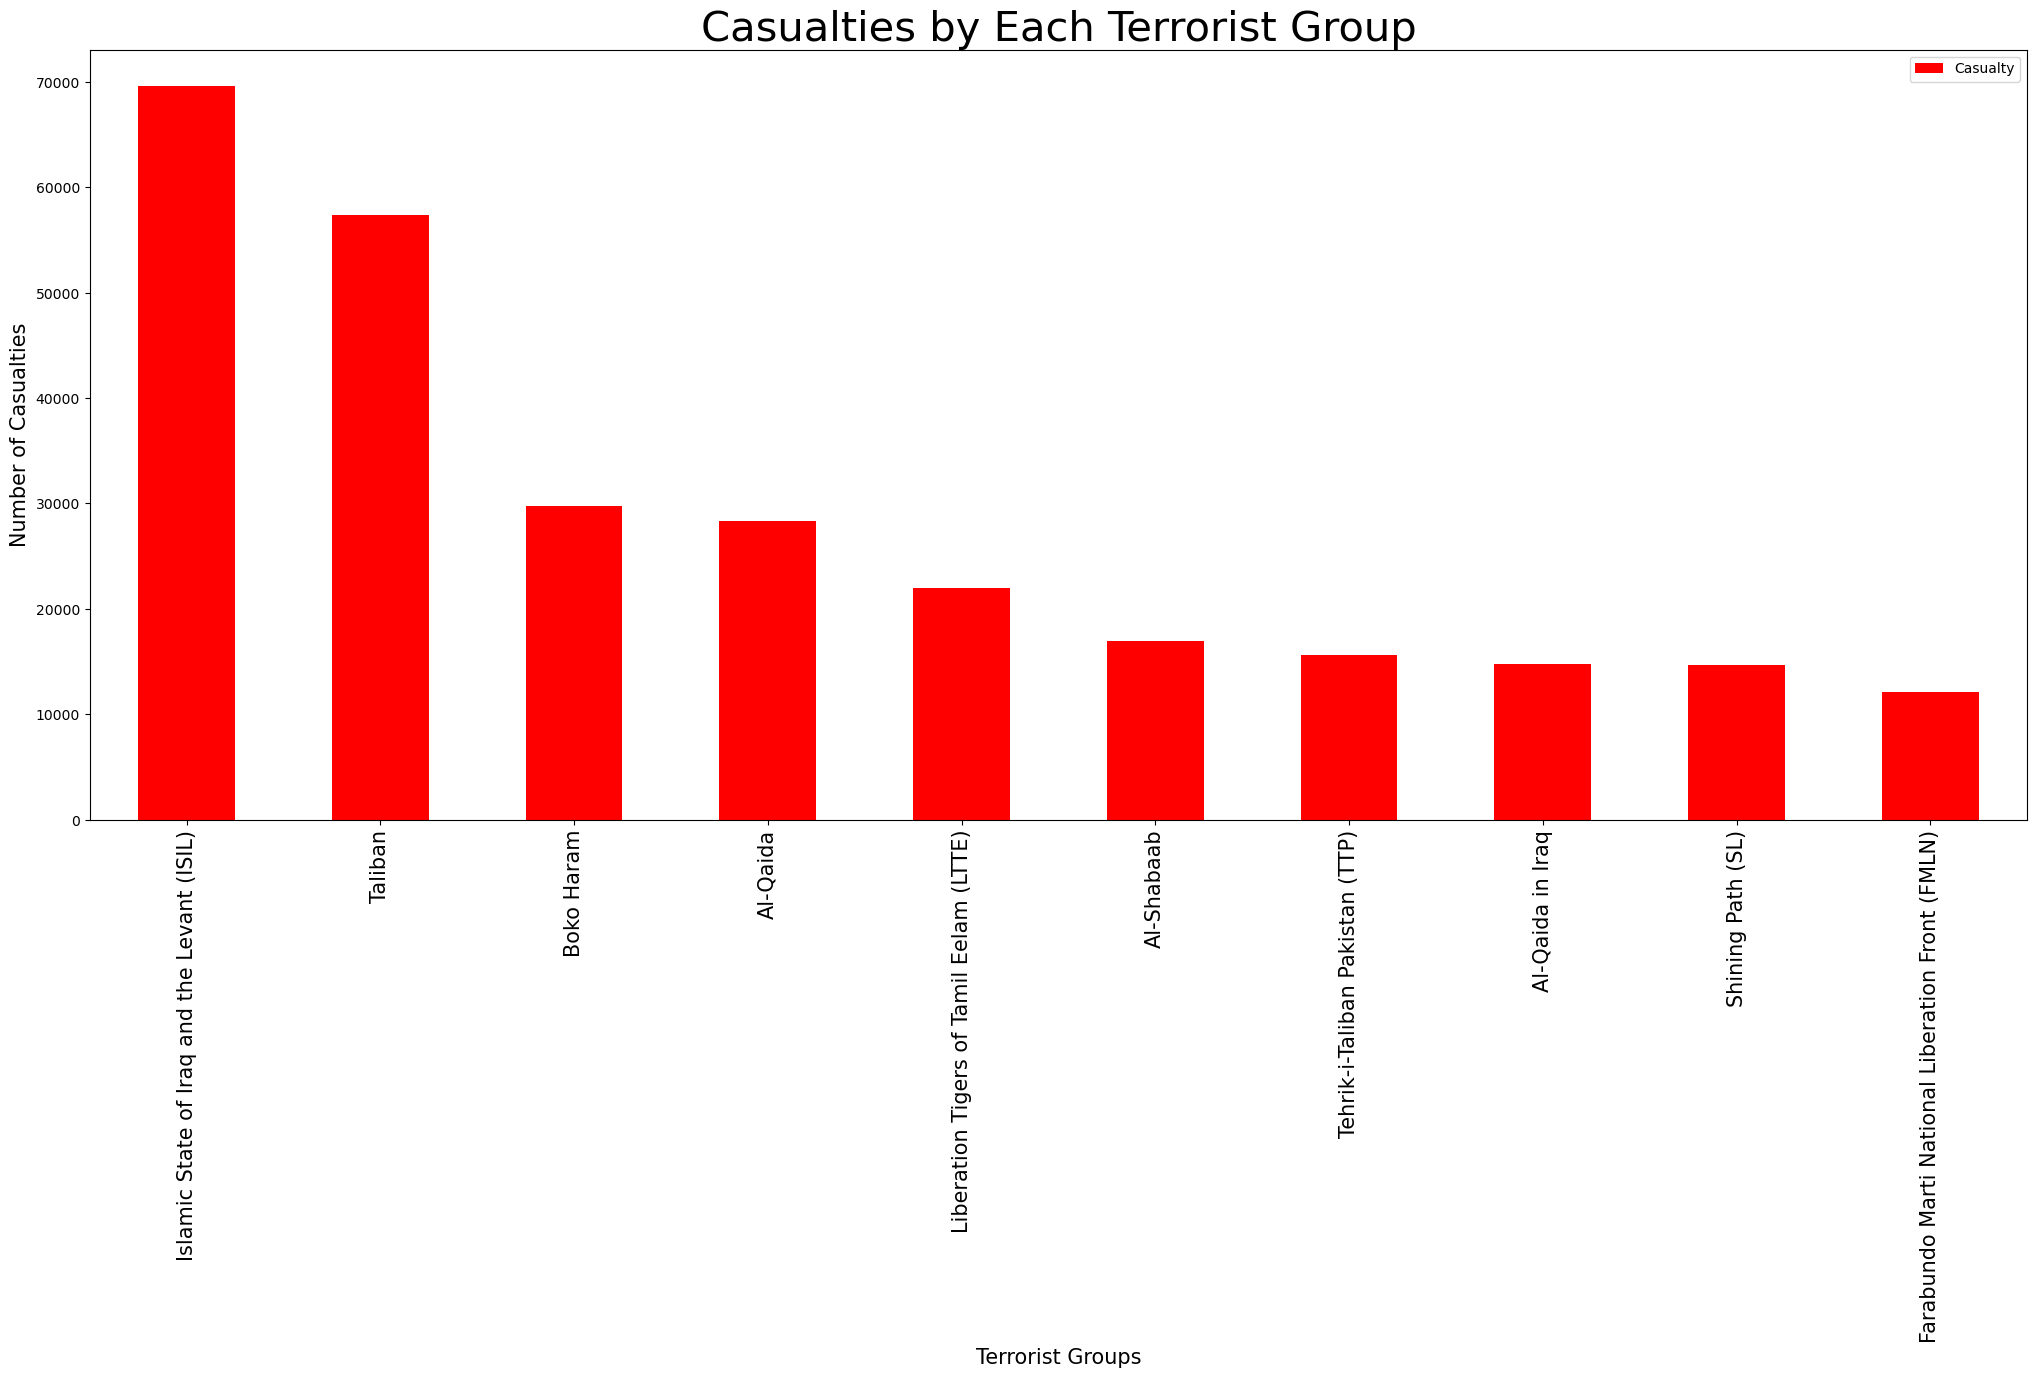

In [110]:
grpcas.head(10).plot(kind="bar",color="red",figsize=(25,10))
plt.title("Casualties by Each Terrorist Group",fontsize=30)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

#### 4.Killed by Each Terrorist Group

In [111]:
grpkil=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")

In [112]:
grpkil.head()

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0


In [113]:
grpkil.tail()

,Killed
Group Name,
New Revolutionary Alternative (NRA),0.0
Council for the Destruction of Order,0.0
Counterrevolutionary Solidarity (SC),0.0
New Partisans Movement,0.0
leftist guerrillas-Bolivarian militia,0.0


#### 4.Wounded by Each Terrorist Group

In [114]:
grpwon=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")

In [115]:
grpwon.head()

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0


In [116]:
grpwon.tail()

,Wounded
Group Name,
International Revolutionary Front,0.0
International Revolutionary Solidarity,0.0
International Solidarity,0.0
Internationalist Cells,0.0
leftist guerrillas-Bolivarian militia,0.0


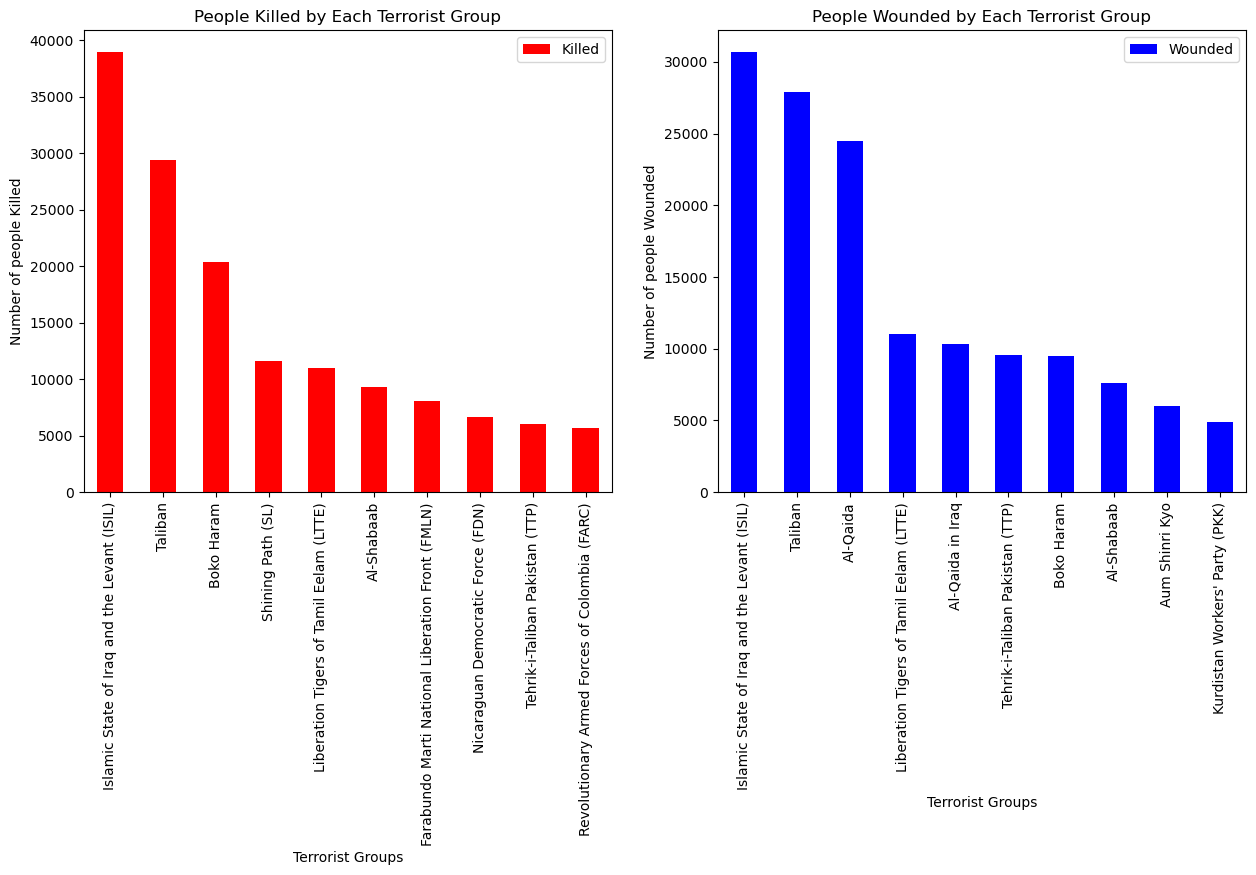

In [117]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
grpkil[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by Each Terrorist Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
grpwon[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by Each Terrorist Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### 6. Attack Type wise Attacks

#### 1.Number of Terrorist Attacks by Each Attack Type

In [119]:
attacktype=df["Attack Type"].value_counts()

In [120]:
attacktype.head()

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: Attack Type, dtype: int64

In [121]:
attacktype.tail()

Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

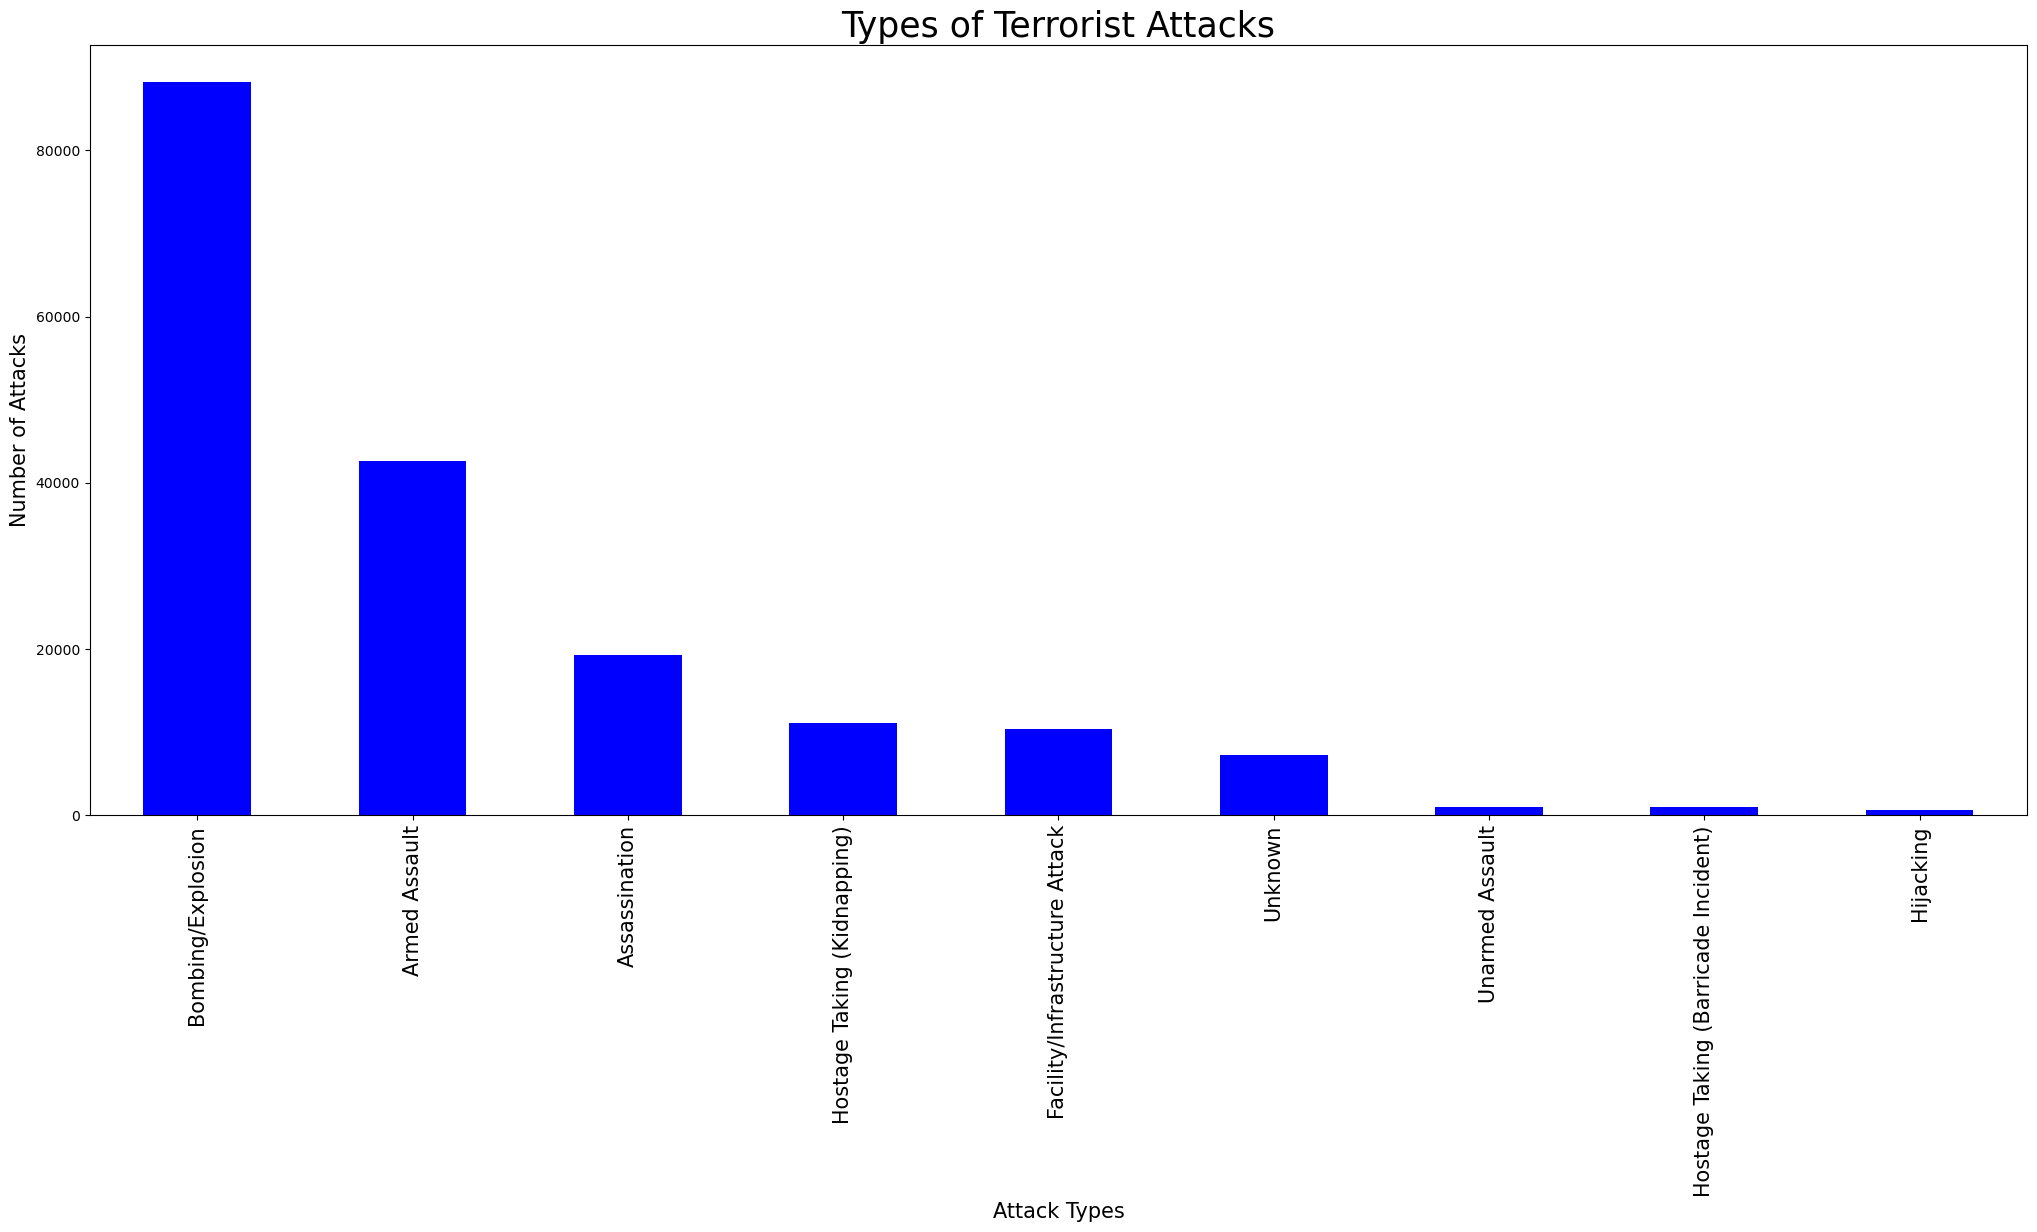

In [122]:
attacktype.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Types of Terrorist Attacks",fontsize=25)
plt.xlabel("Attack Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

#### 2.Total People Casualties (Killed + Wounded) by Each Attack Type

In [123]:
attackcas=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)

In [124]:
attackcas.head()

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0


In [125]:
attackcas.tail()

,Casualty
Attack Type,
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


In [126]:
attackcas

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


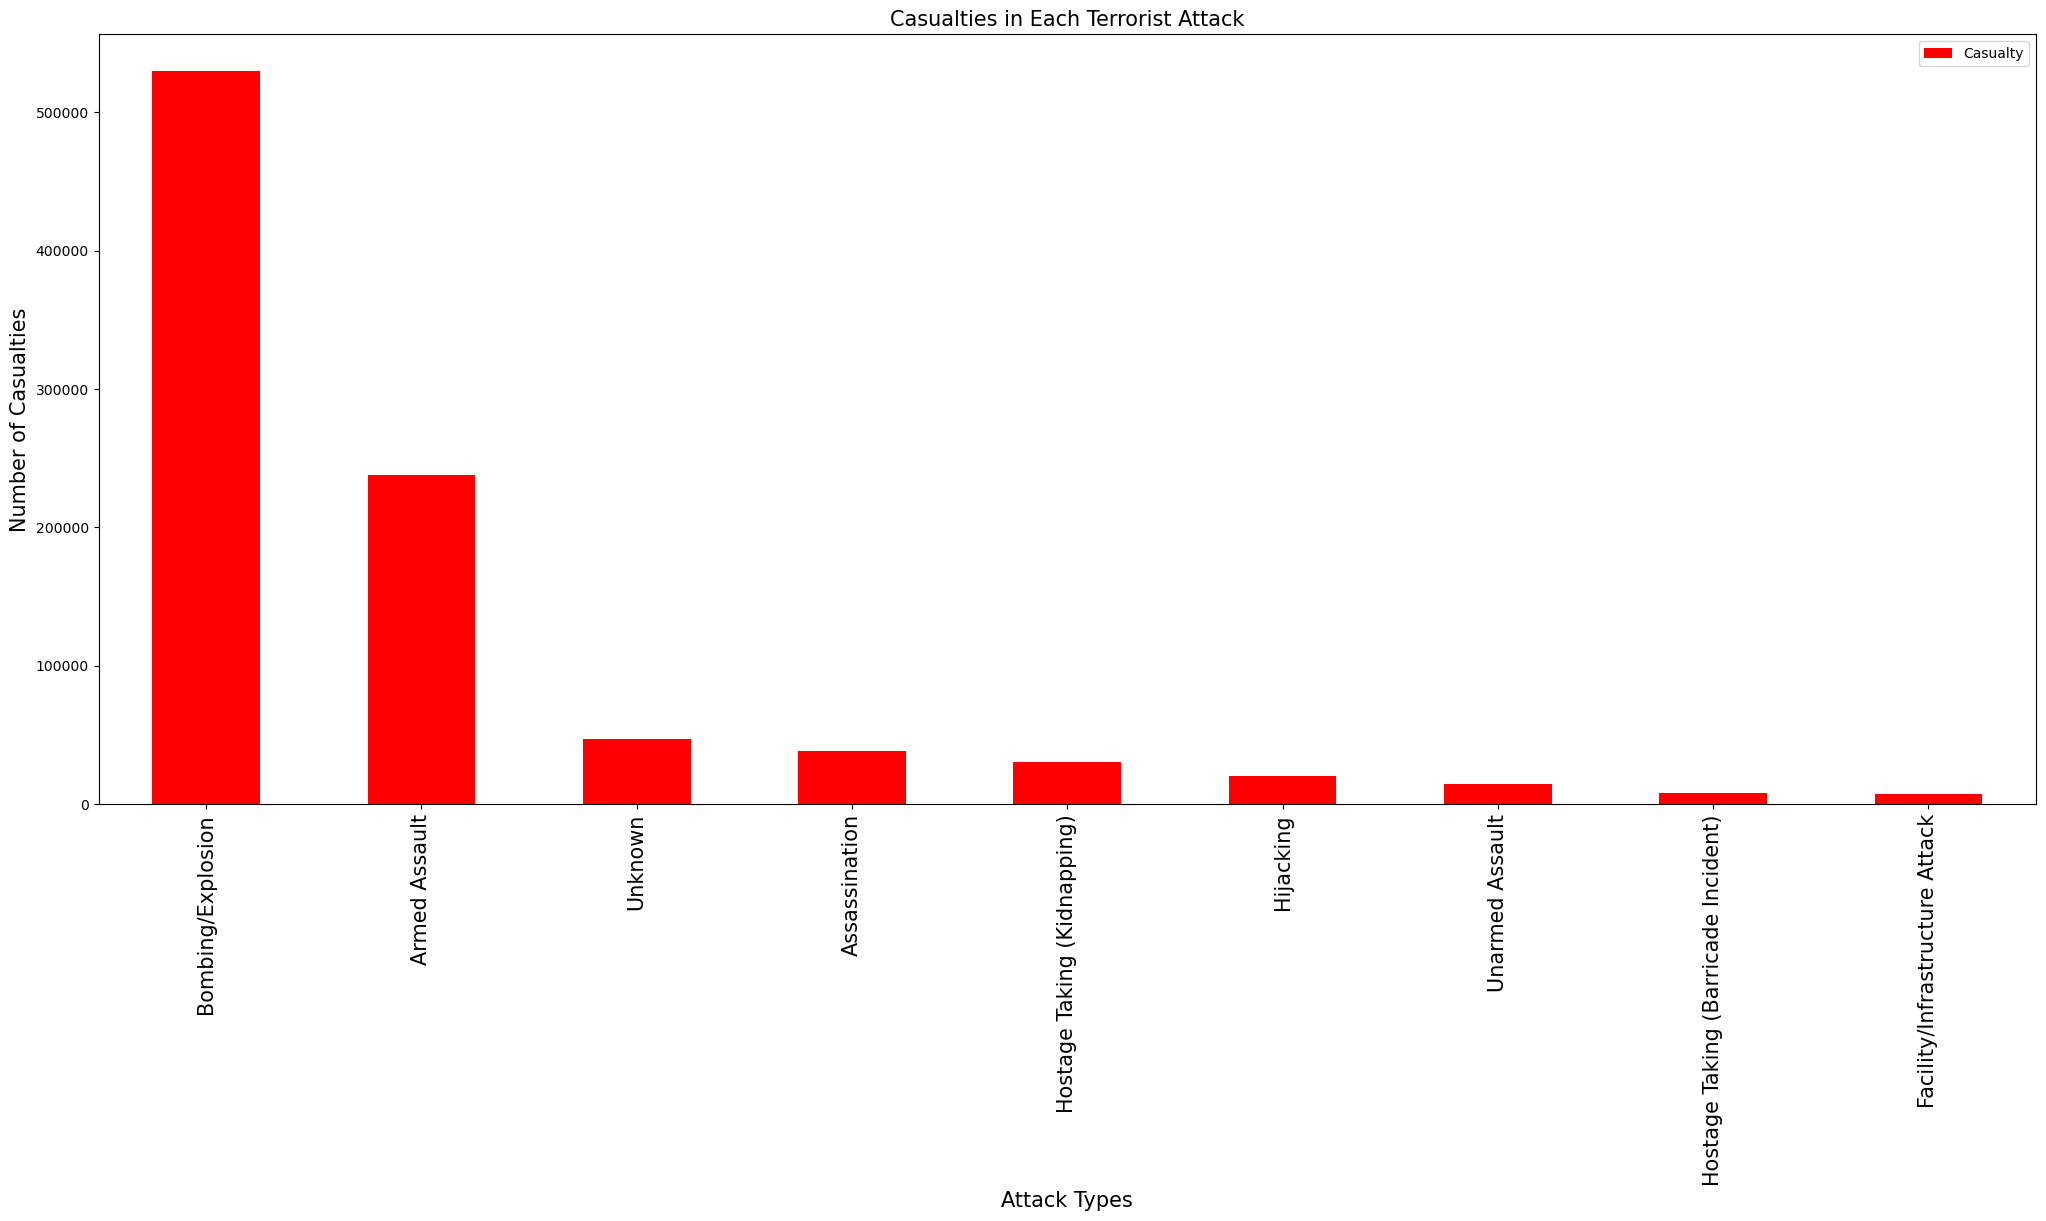

In [127]:
attackcas.plot(kind="bar",color="red",figsize=(25,10))
plt.title("Casualties in Each Terrorist Attack",fontsize=15)
plt.xlabel("Attack Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

#### 3.People Killed by Each Terrorist Attack Type

In [128]:
att=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)

In [129]:
att.head()

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0


In [130]:
att.tail()

,Killed
Attack Type,
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


#### 4.People Wounded by Each Terrorist Attack Type

In [131]:
attwun=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)

In [132]:
attwun.head()

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0


In [133]:
attwun.tail()

,Wounded
Attack Type,
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


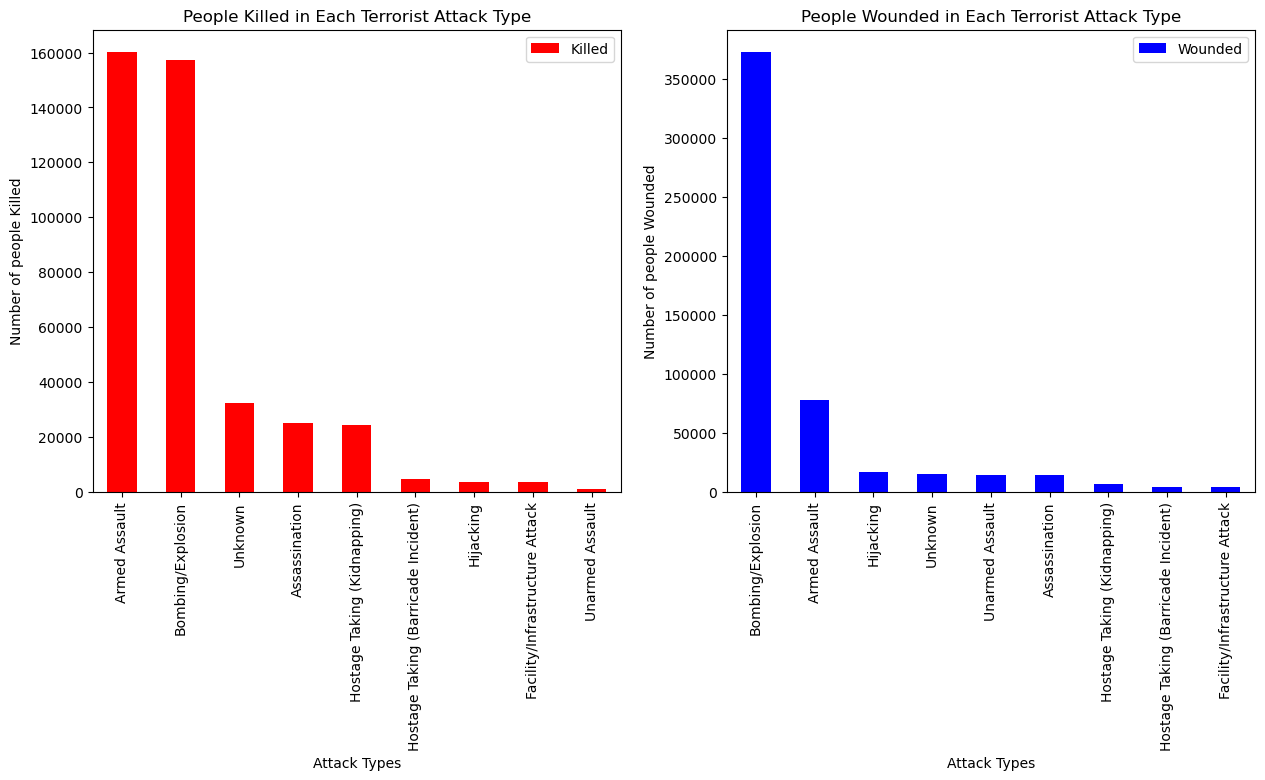

In [134]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
att.plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in Each Terrorist Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
attwun.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in Each Terrorist Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### 7. Target Types Wise Terrorist Attacks

#### 1.Number of Terrorist Attacks Each Target Types

In [135]:
terrat=df["Target Type"].value_counts()

In [136]:
terrat.head()

Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: Target Type, dtype: int64

In [137]:
terrat.tail()

Tourists                440
Maritime                351
Food or Water Supply    317
Abortion Related        263
Other                   137
Name: Target Type, dtype: int64

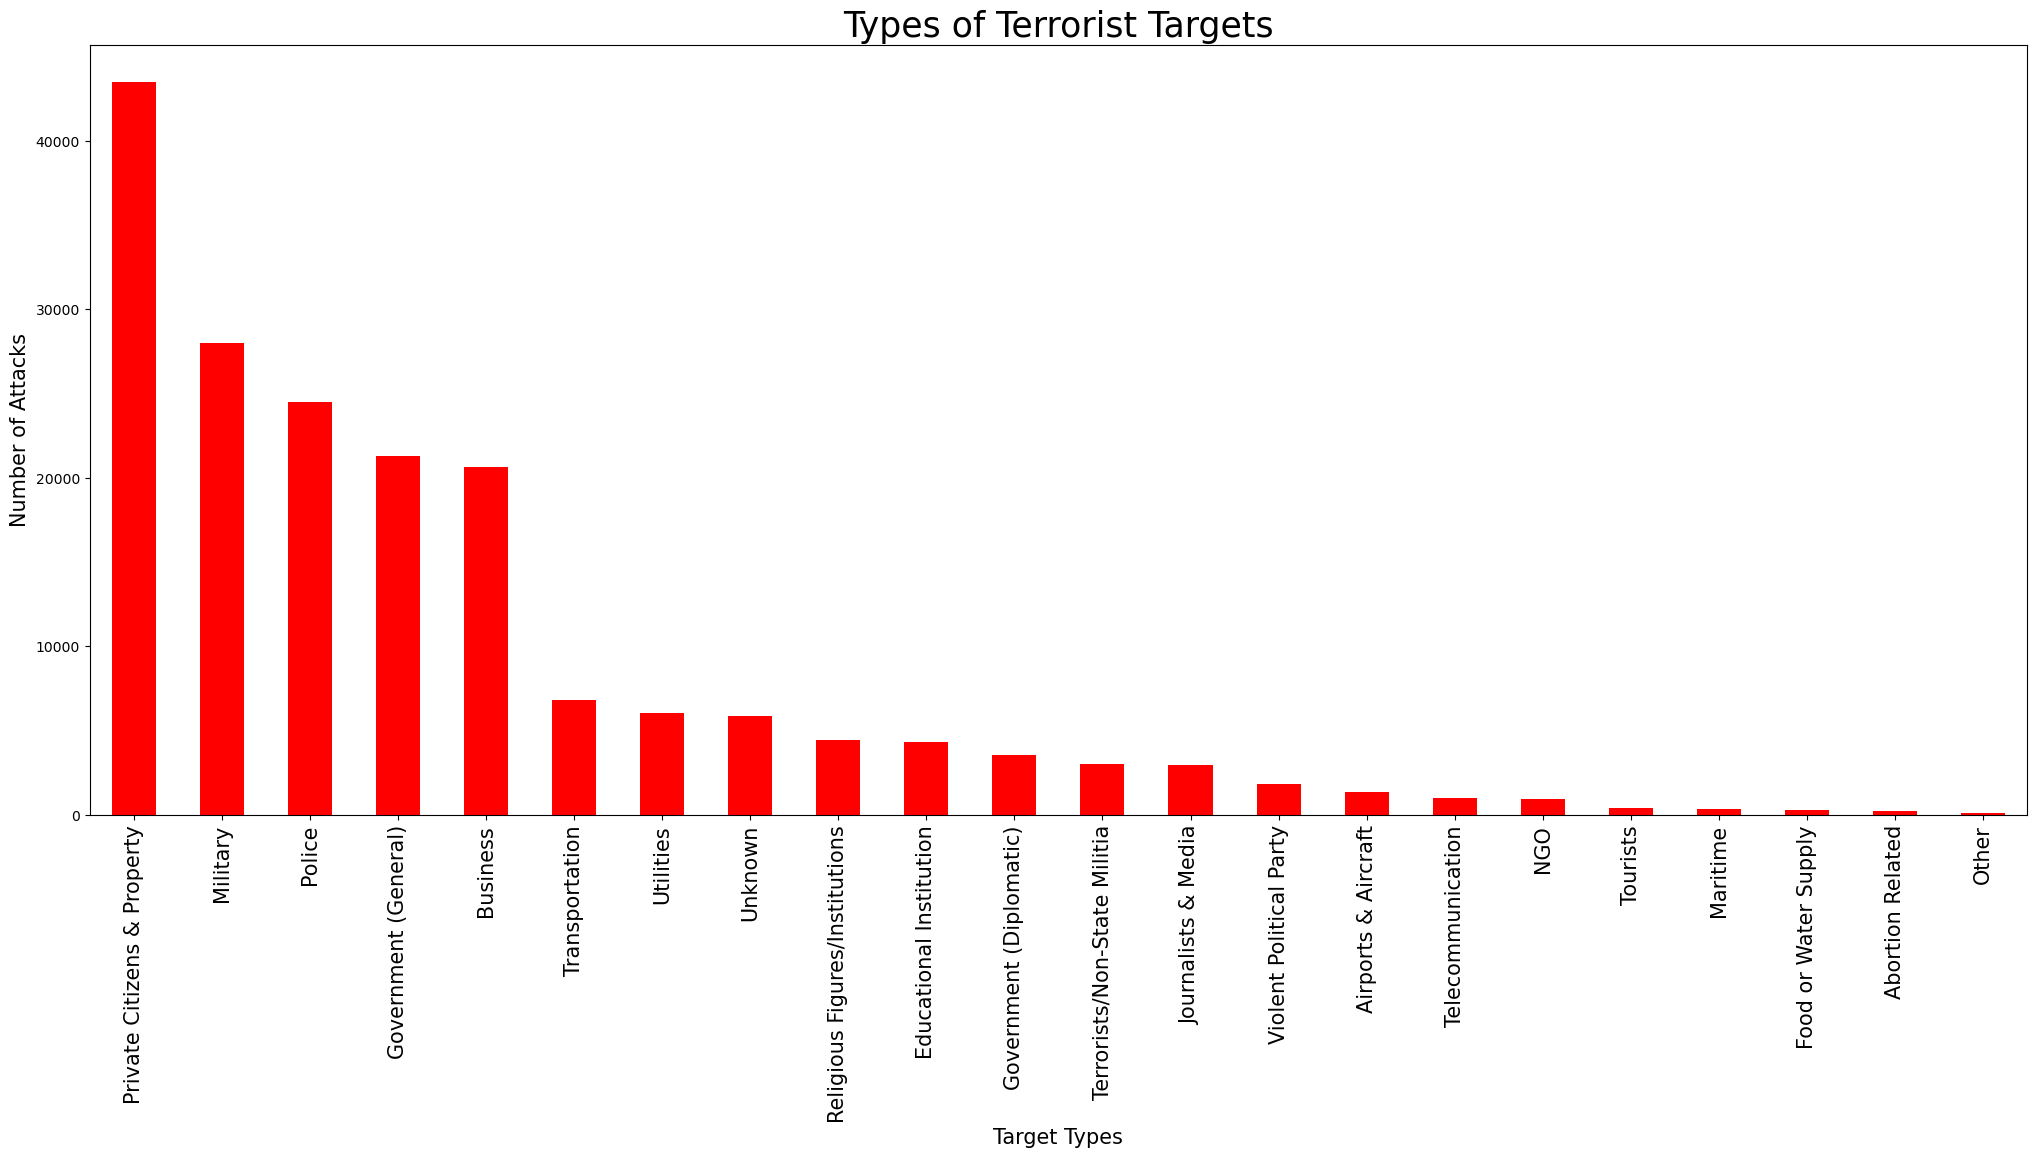

In [138]:
terrat.plot(kind="bar",color="red",figsize=(25,10))
plt.title("Types of Terrorist Targets",fontsize=25)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [139]:
terrcas=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)

In [140]:
terrcas.head()

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0


In [141]:
terrcas.tail()

,Casualty
Target Type,
NGO,1950.0
Telecommunication,679.0
Other,674.0
Food or Water Supply,547.0
Abortion Related,56.0


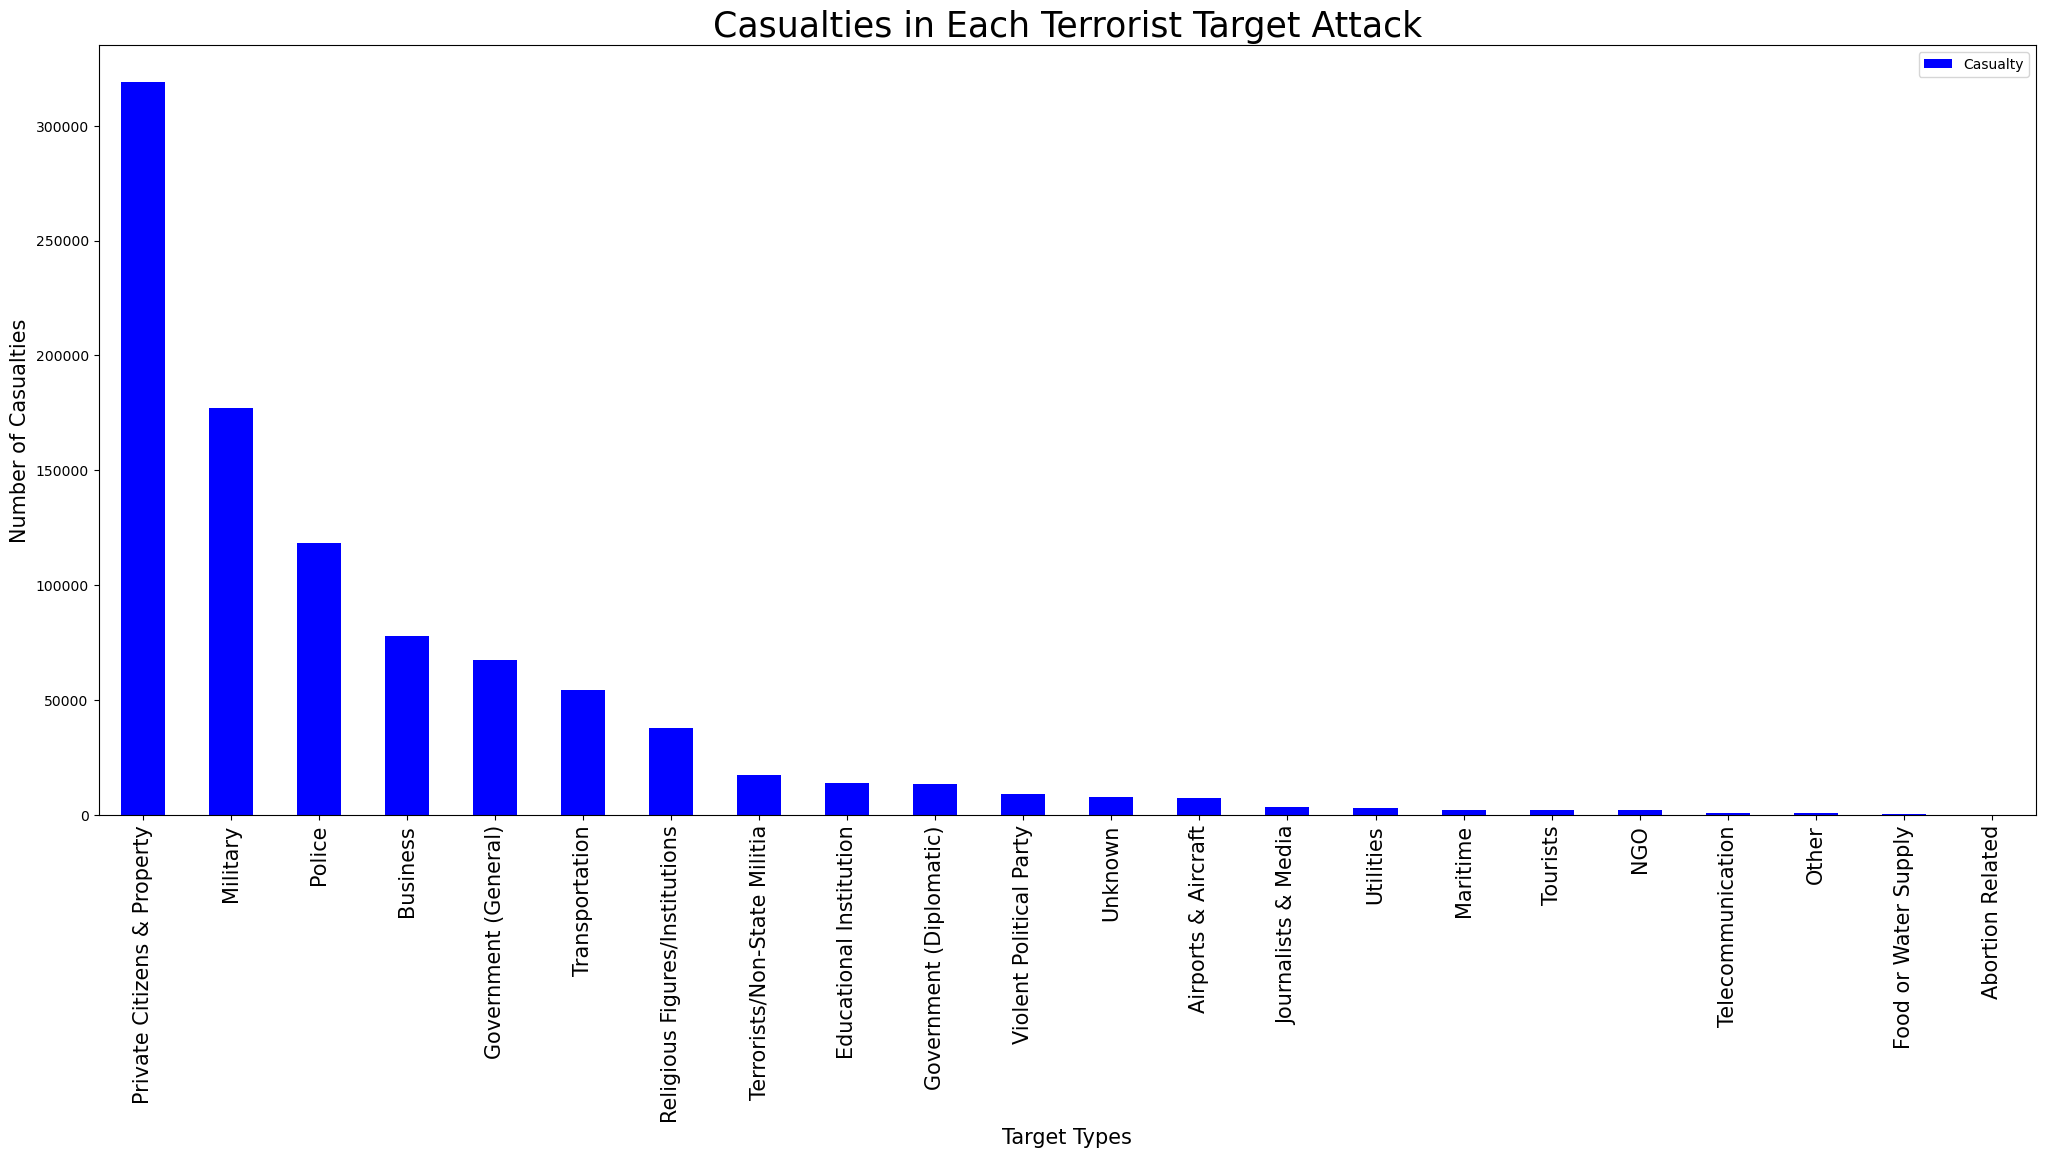

In [142]:
terrcas.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Casualties in Each Terrorist Target Attack",fontsize=25)
plt.xlabel("Target Types",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()

In [143]:
tykil=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)

In [144]:
tykil.head()

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0


In [145]:
tykil.tail()

,Killed
Target Type,
Tourists,758.0
Food or Water Supply,313.0
Other,255.0
Telecommunication,182.0
Abortion Related,10.0


In [146]:
tywou=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)

In [147]:
tywou.head()

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0


In [148]:
tywou.tail()

,Wounded
Target Type,
NGO,893.0
Telecommunication,497.0
Other,419.0
Food or Water Supply,234.0
Abortion Related,46.0


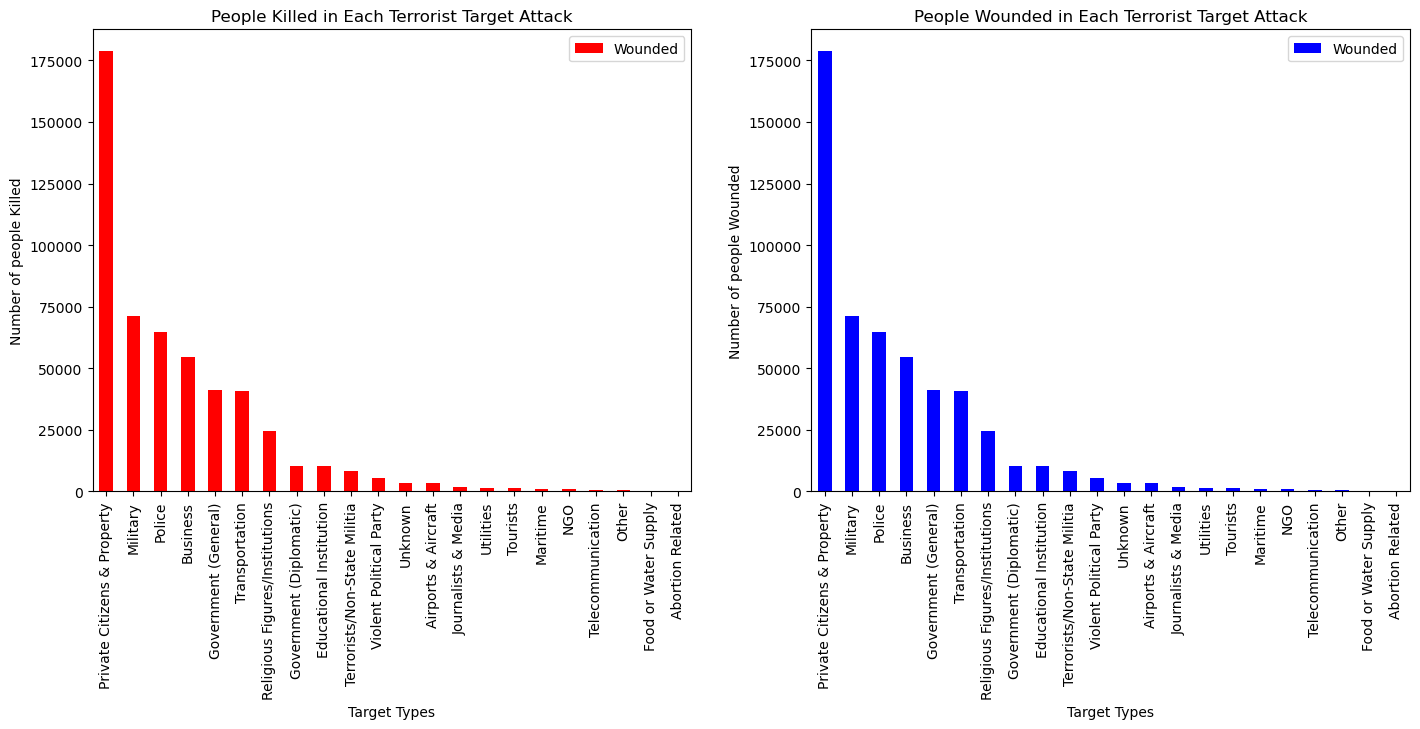

In [149]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tywou.plot(kind="bar",color="red",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in Each Terrorist Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tywou.plot(kind="bar",color="blue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in Each Terrorist Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()


### 8. Group + Country Wise Terrorist Attacks

#### 1.Sorting by Number of Terrorist Attacks

In [150]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_83956\2706986842.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


In [151]:
gca.head()

Group Name                                        Country    
Taliban                                           Afghanistan    7423
Islamic State of Iraq and the Levant (ISIL)       Iraq           4797
Shining Path (SL)                                 Peru           4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador    3330
Al-Shabaab                                        Somalia        2867
dtype: int64

In [152]:
gca.tail()

Group Name                             Country 
Anti-Iran Government Exiles            Germany     1
Left-Wing Terrorists                   Bolivia     1
                                       Brazil      1
                                       Colombia    1
leftist guerrillas-Bolivarian militia  Colombia    1
dtype: int64

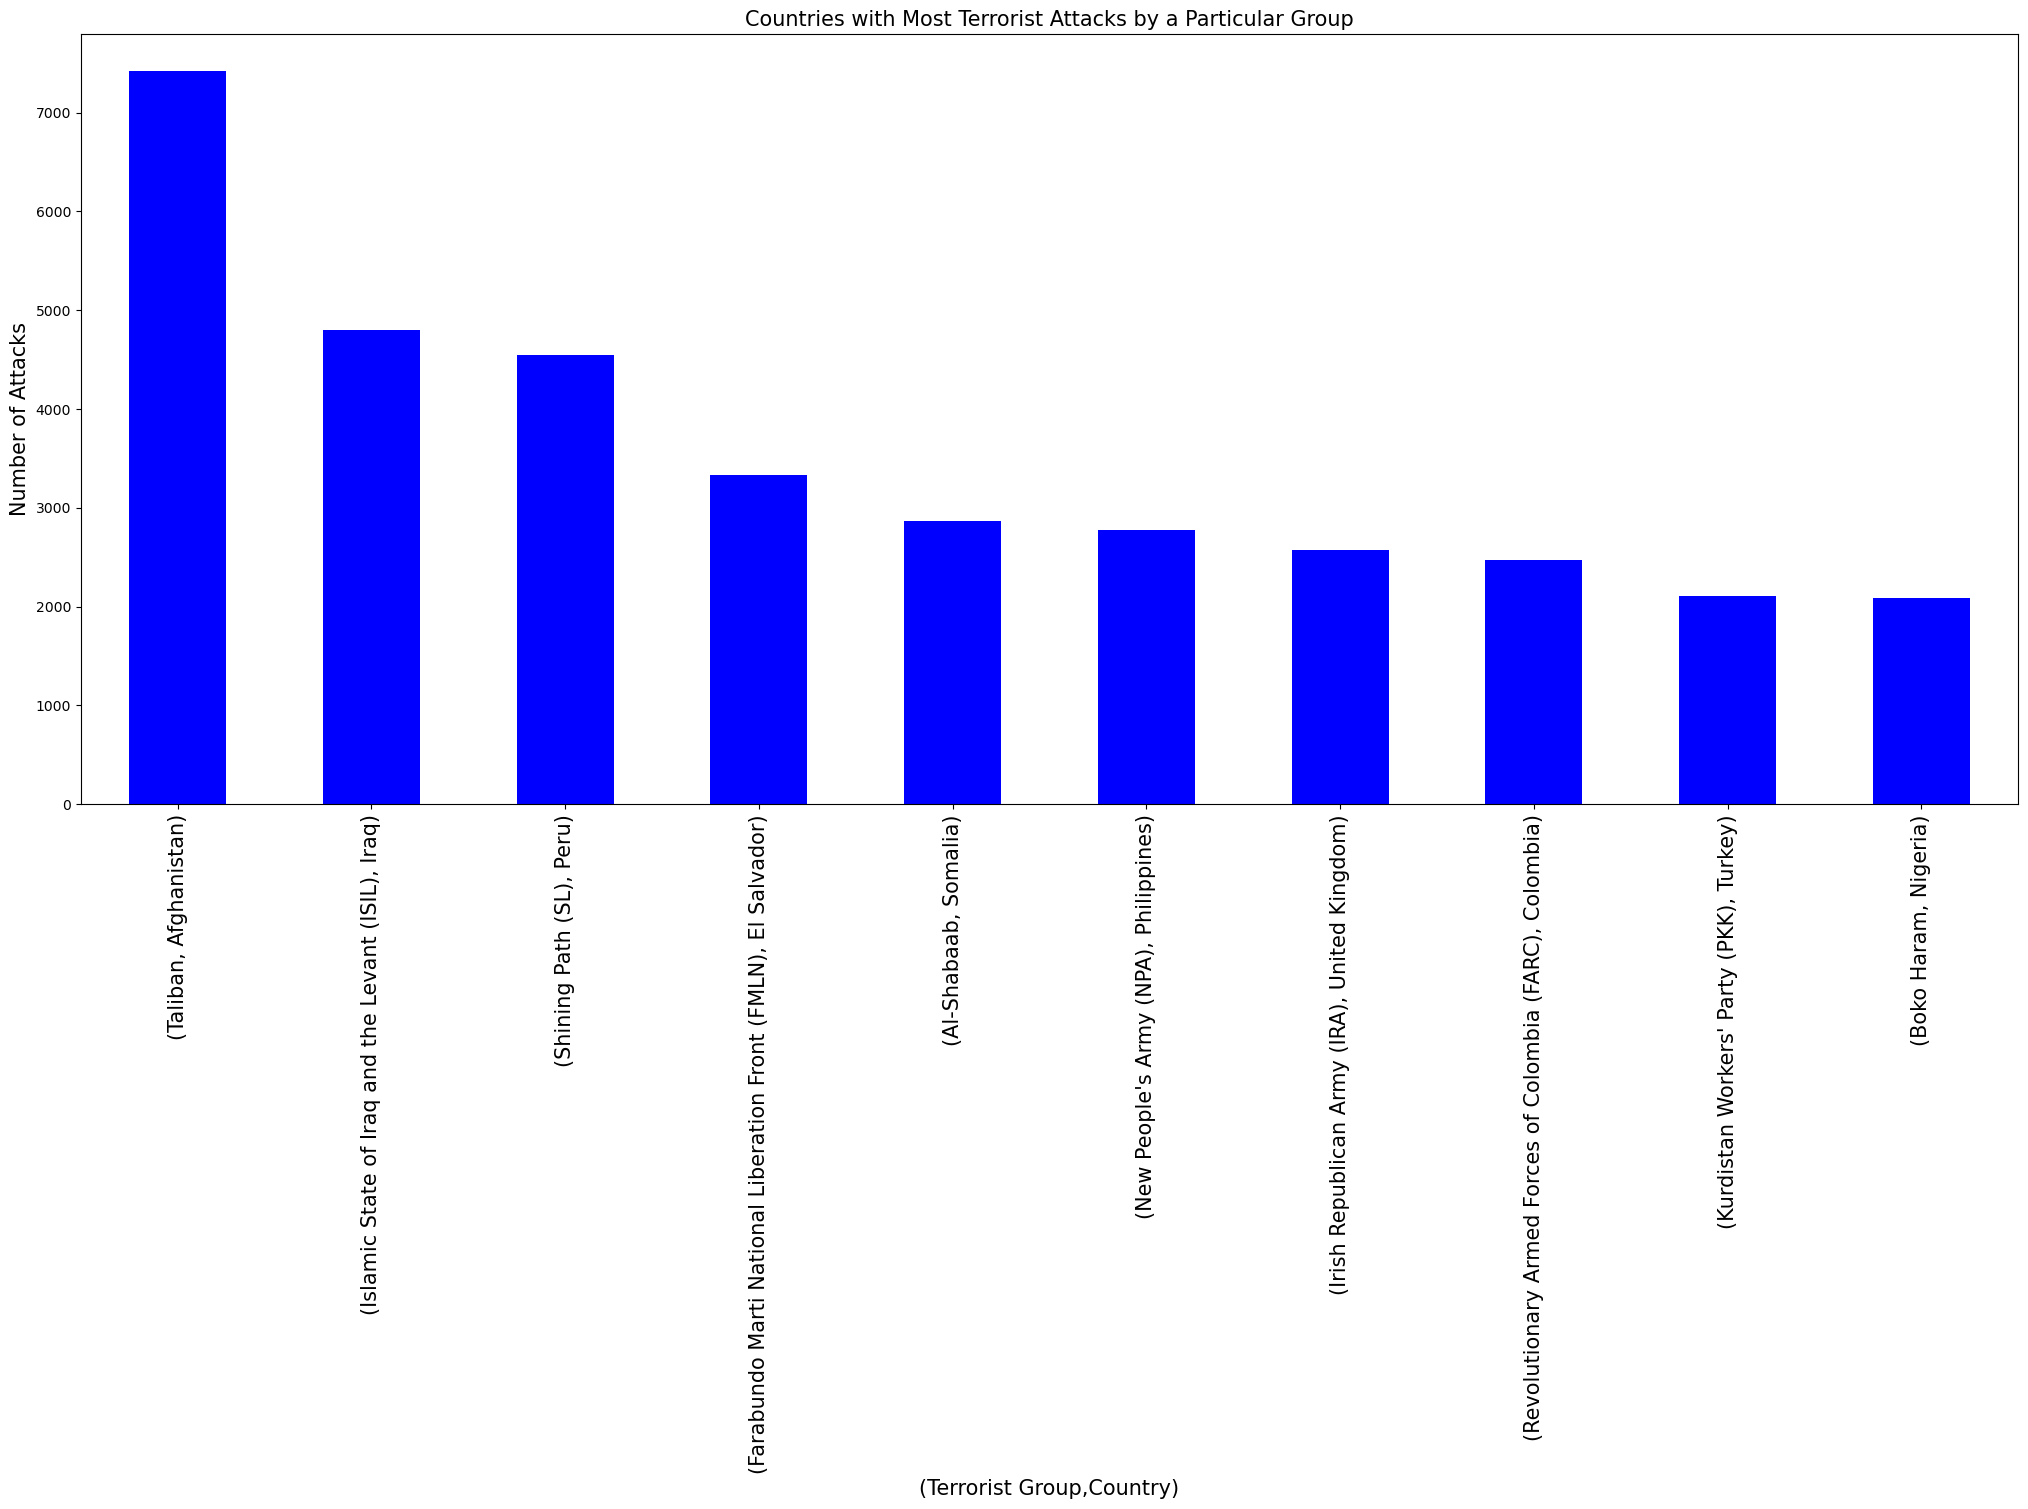

In [153]:
gca.head(10).plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Countries with Most Terrorist Attacks by a Particular Group",fontsize=15)
plt.xlabel("(Terrorist Group,Country)",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

#### 2.Sorting by Number of People Casualties

In [154]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_83956\2792274110.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


In [155]:
gcc.head()

,,Casualty
Group Name,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0


In [156]:
gcc.tail()

,,Casualty
Group Name,Country,
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,12068.0


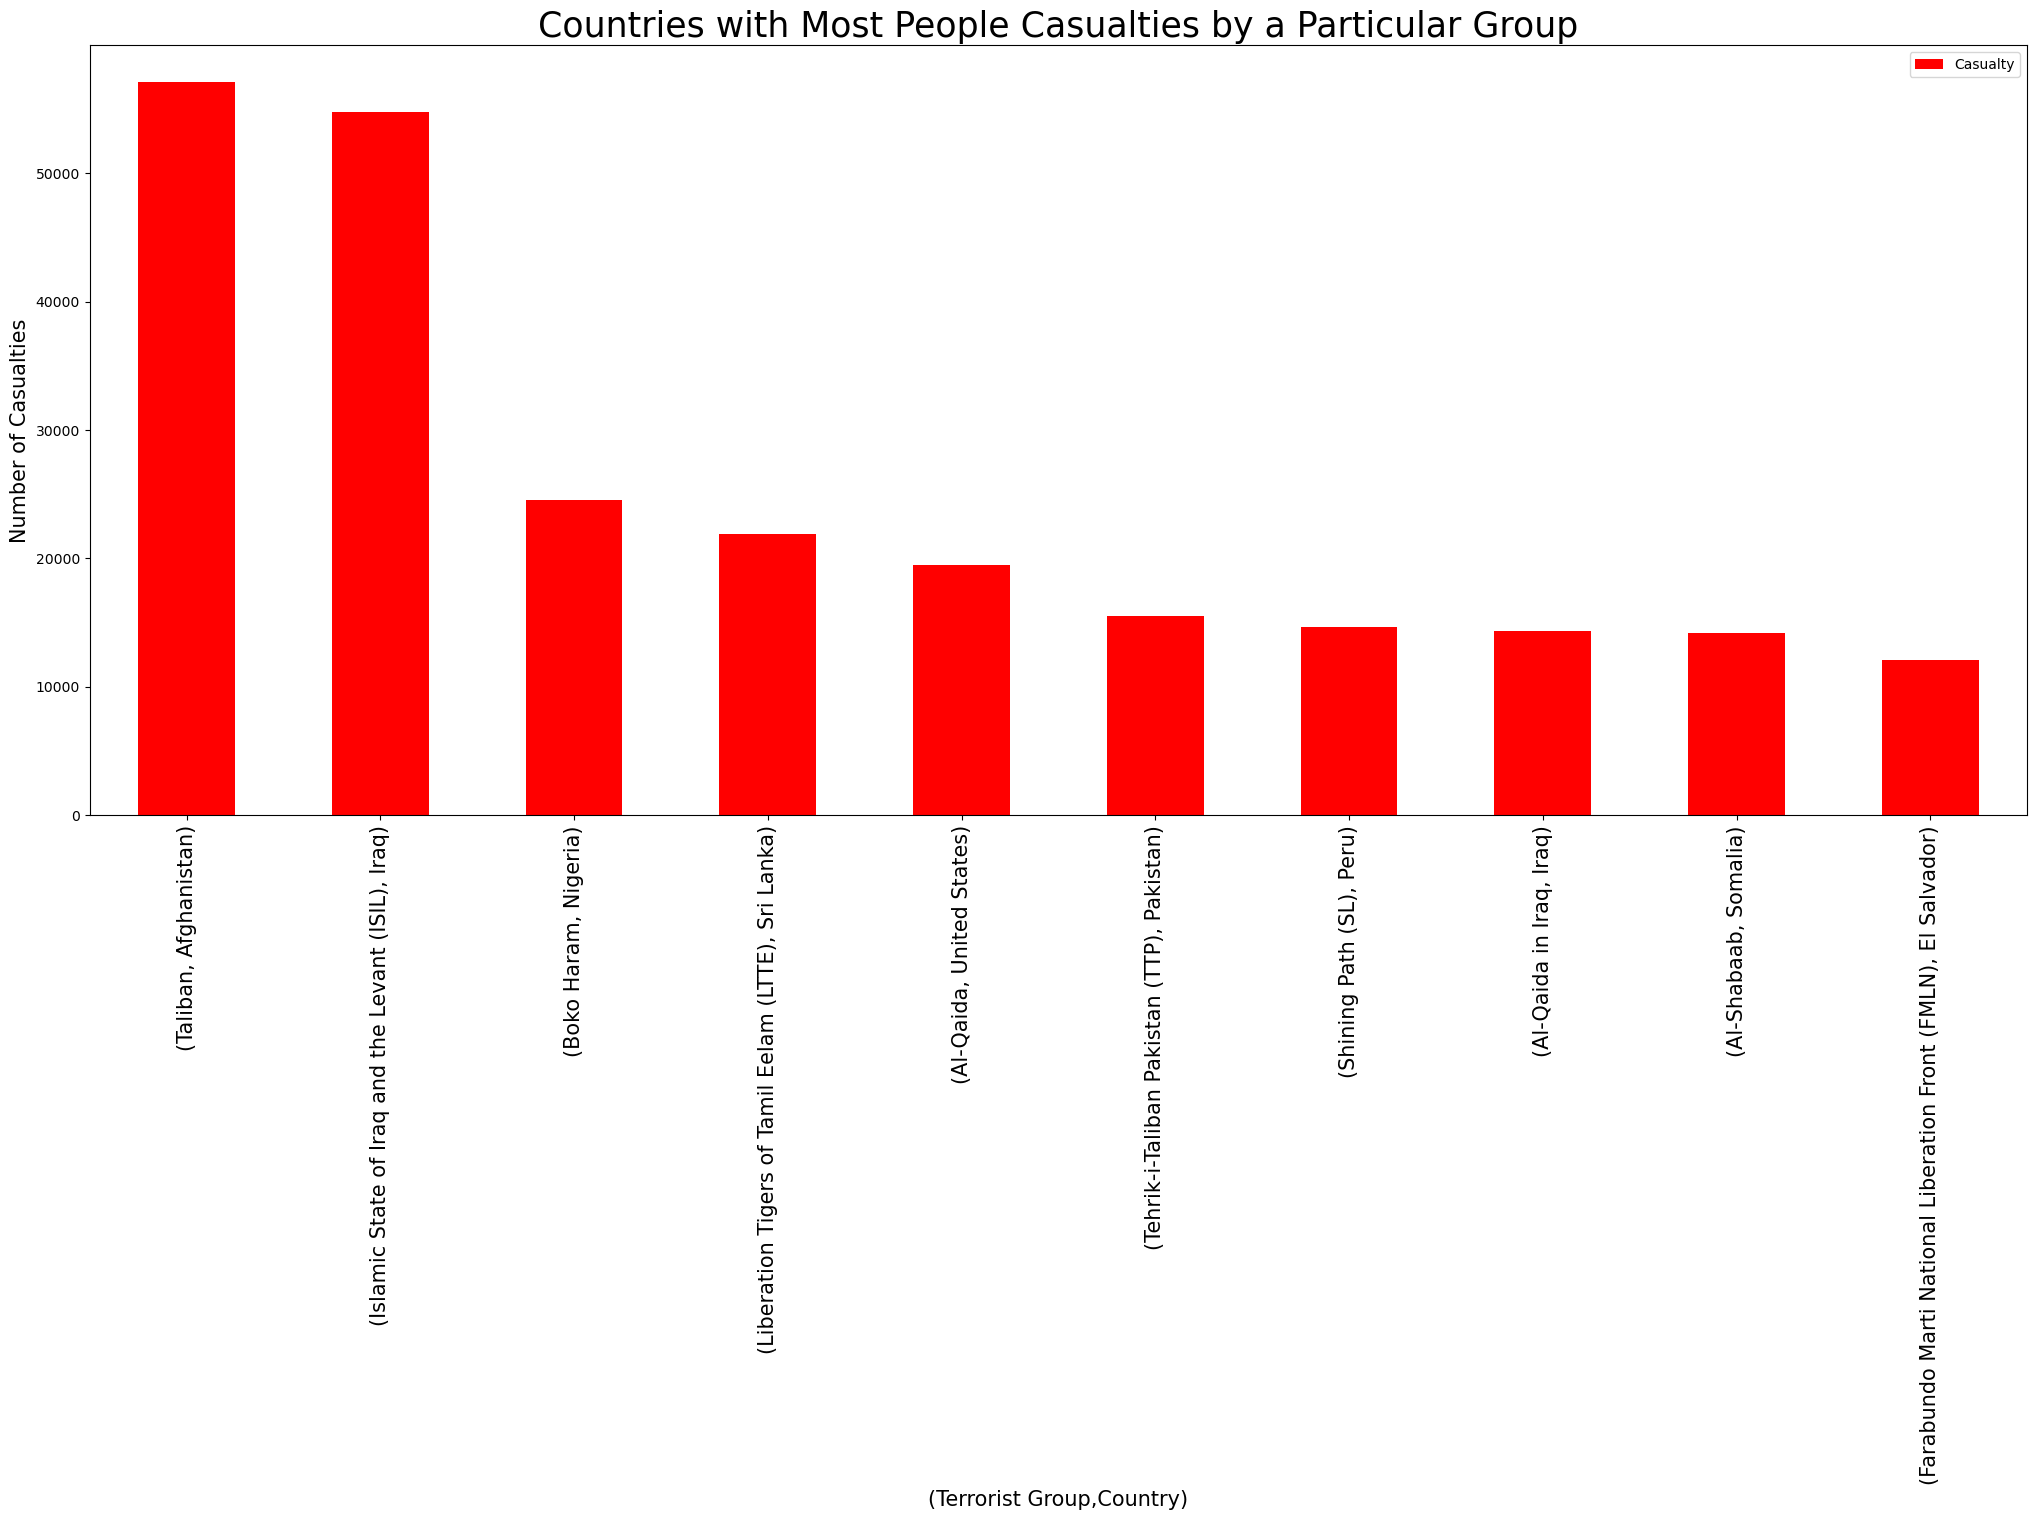

In [157]:
gcc.plot(kind="bar",color="red",figsize=(25,10))
plt.title("Countries with Most People Casualties by a Particular Group",fontsize=25)
plt.xlabel("(Terrorist Group,Country)",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of Casualties",fontsize=15)
plt.show()


#### 3.Sorting by Number of People Killed In Terrorist Attack

In [158]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_83956\2470102482.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


In [159]:
gck.head()

,,Killed
Group Name,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0


In [160]:
gck.tail()

,,Killed
Group Name,Country,
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


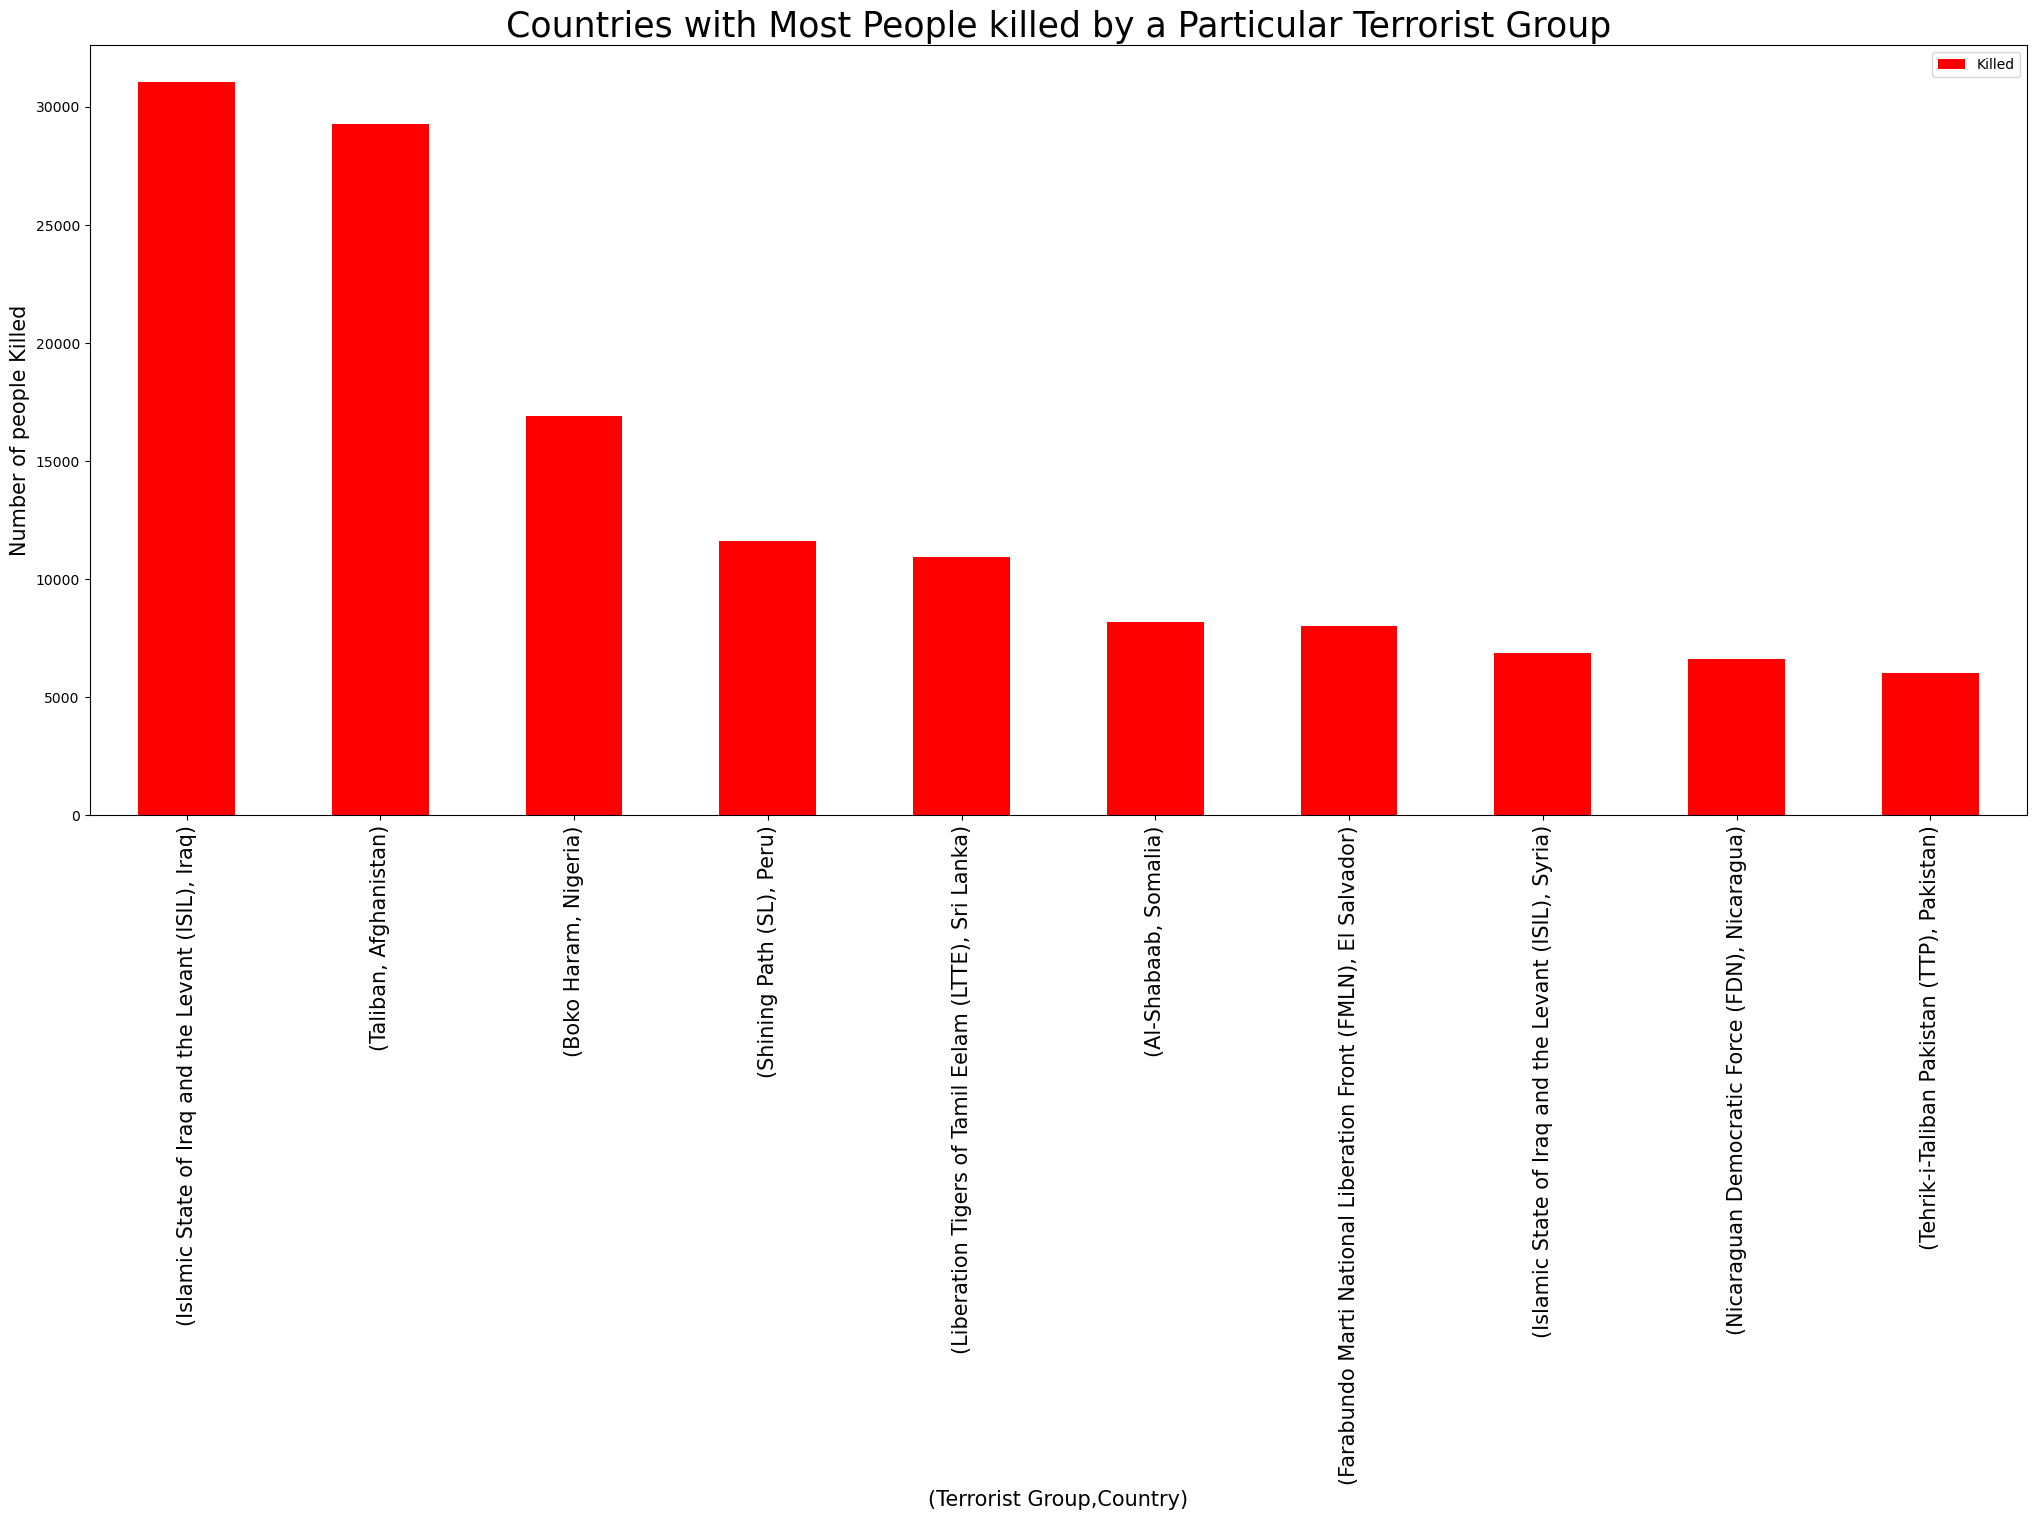

In [161]:
gck.plot(kind="bar",color="red",figsize=(25,10))
plt.title("Countries with Most People killed by a Particular Terrorist Group",fontsize=25)
plt.xlabel("(Terrorist Group,Country)",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of people Killed",fontsize=15)
plt.show()

#### 4.Sorting by Number of People Wounded in Terrorist Attacks

In [162]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_83956\3729394521.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


In [163]:
gcw.head()

,,Wounded
Group Name,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0


In [164]:
gcw.tail()

,,Wounded
Group Name,Country,
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0
Kurdistan Workers' Party (PKK),Turkey,4795.0


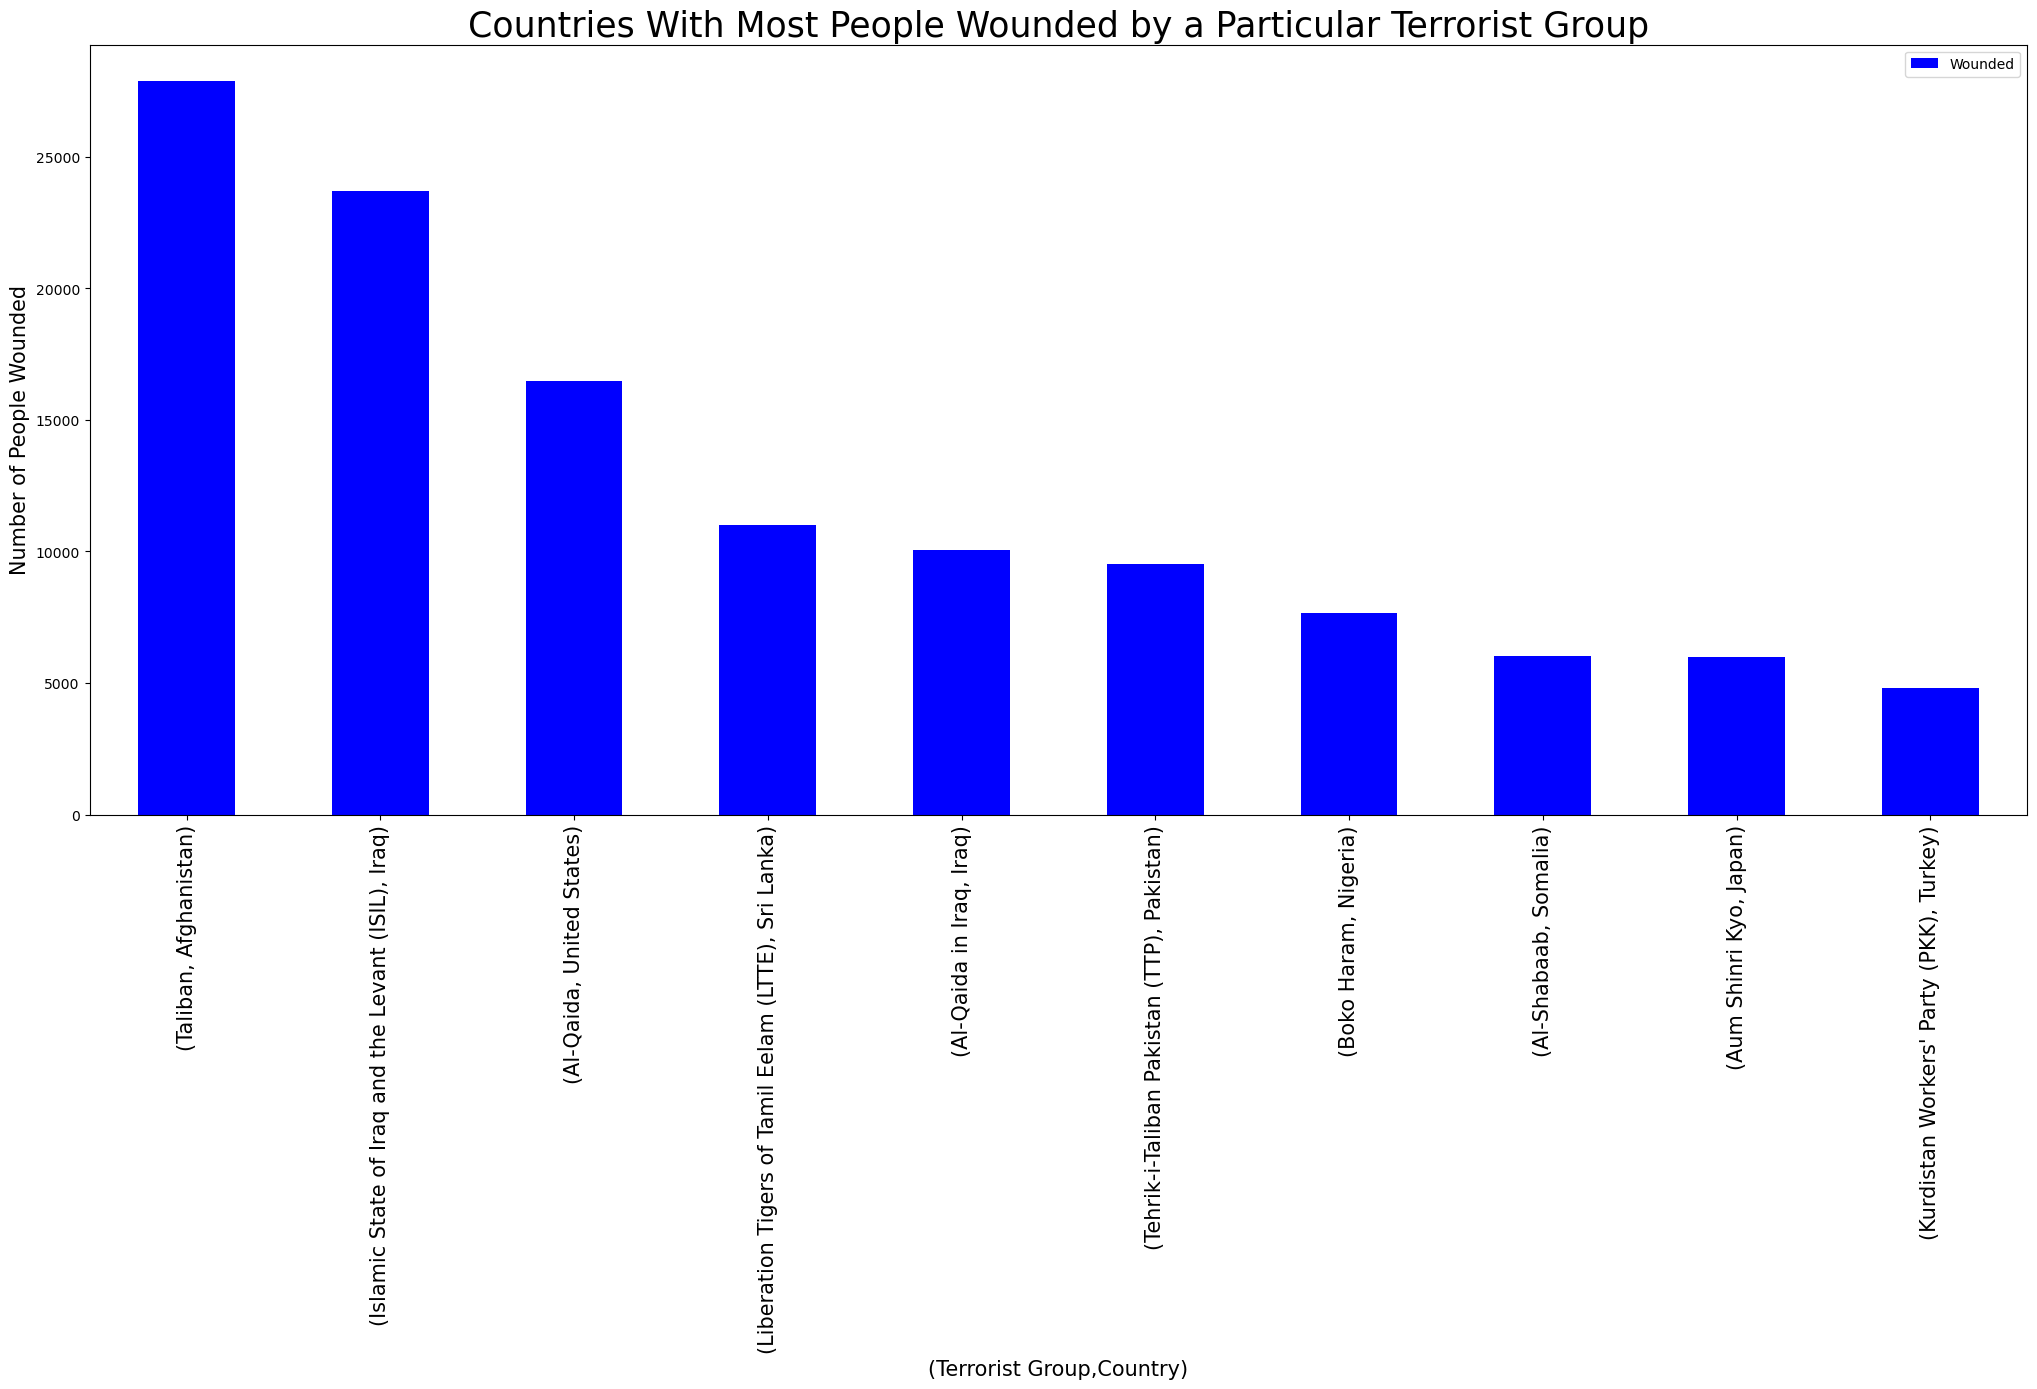

In [165]:
gcw.plot(kind="bar",color="blue",figsize=(25,10))
plt.title("Countries With Most People Wounded by a Particular Terrorist Group",fontsize=25)
plt.xlabel("(Terrorist Group,Country)",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Number of People Wounded",fontsize=15)
plt.show()

### 9. 1970 - 2017 Humanity Affected World-wide by Terrorist Attacks

#### 1.1970 - 2017 Total Casualties World-wide by Terrorist Attacks

In [166]:
casualty=df.loc[:,"Casualty"]

In [167]:
casualty=df.loc[:,"Casualty"].sum()

In [168]:
casualty

935737.0

#### 2.People Killed due to Terrorist Attacks

In [169]:
kill=df.loc[:,"Killed"]

In [170]:
kill=df.loc[:,"Killed"].sum()

In [171]:
kill

411868.0

#### 3.People Wounded due to Terrorist Attacks

In [172]:
wound=df.loc[:,"Wounded"]

In [173]:
wound=df.loc[:,"Wounded"].sum()

In [ ]:
wound